In [16]:
!pip install pandas
!pip install scikit-learn

In [17]:
import pandas as pd

# Load the CSV file
file_path = 'C:\\Users\\gapar\\Downloads\\external_df.csv'

data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

problem    level     type
0  Kevin Kangaroo begins hopping on a number line...  Level 5  Algebra
1  The ratio of the areas of two squares is $\fra...  Level 4  Algebra
2  If $\sqrt{2\sqrt{t-2}} = \sqrt[4]{7 - t}$, the...  Level 4  Algebra
3  Let $t(x) = \sqrt{3x+1}$ and $f(x)=5-t(x)$. Wh...  Level 4  Algebra
4  James has a total of 66 dollars in his piggy b...  Level 2  Algebra

In [18]:
# Basic tokenization function without using NLTK's word_tokenize
def basic_tokenize(text):
    # Convert to lowercase and split on whitespace
    tokens = text.lower().split()
    return tokens

# Convert all entries in 'problem' to strings and handle NaN values by replacing them with a placeholder string
data['problem'] = data['problem'].fillna('').astype(str)

# Apply basic tokenization again to the 'problem' column
data['basic_tokenized_problems'] = data['problem'].apply(basic_tokenize)

# Display the first few rows with tokenized text to verify
data[['problem', 'basic_tokenized_problems']].head()


problem  \
0  Kevin Kangaroo begins hopping on a number line...   
1  The ratio of the areas of two squares is $\fra...   
2  If $\sqrt{2\sqrt{t-2}} = \sqrt[4]{7 - t}$, the...   
3  Let $t(x) = \sqrt{3x+1}$ and $f(x)=5-t(x)$. Wh...   
4  James has a total of 66 dollars in his piggy b...   

                            basic_tokenized_problems  
0  [kevin, kangaroo, begins, hopping, on, a, numb...  
1  [the, ratio, of, the, areas, of, two, squares,...  
2  [if, $\sqrt{2\sqrt{t-2}}, =, \sqrt[4]{7, -, t}...  
3  [let, $t(x), =, \sqrt{3x+1}$, and, $f(x)=5-t(x...  
4  [james, has, a, total, of, 66, dollars, in, hi...

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# We use the original 'problem' column to fit and transform with TF-IDF
# This is because TF-IDF is designed to work directly with text data
tfidf_matrix = tfidf_vectorizer.fit_transform(data['problem'])

# Show the shape of the TF-IDF matrix to understand its structure
tfidf_matrix.shape


(12501, 10331)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gapar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2281160583.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")  # Corrected x and y keyword arguments


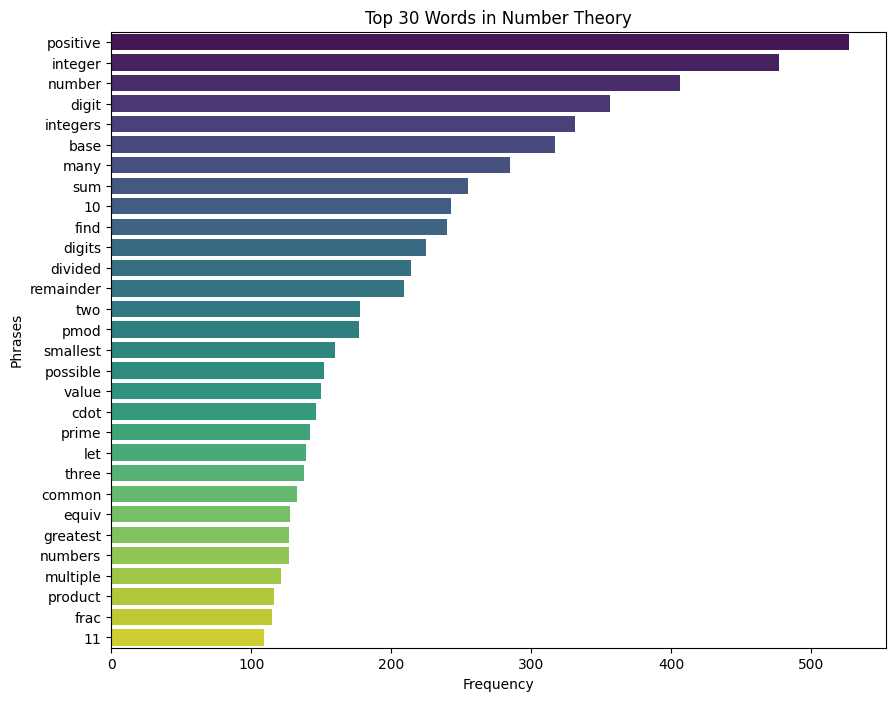

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2281160583.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")  # Corrected x and y keyword arguments


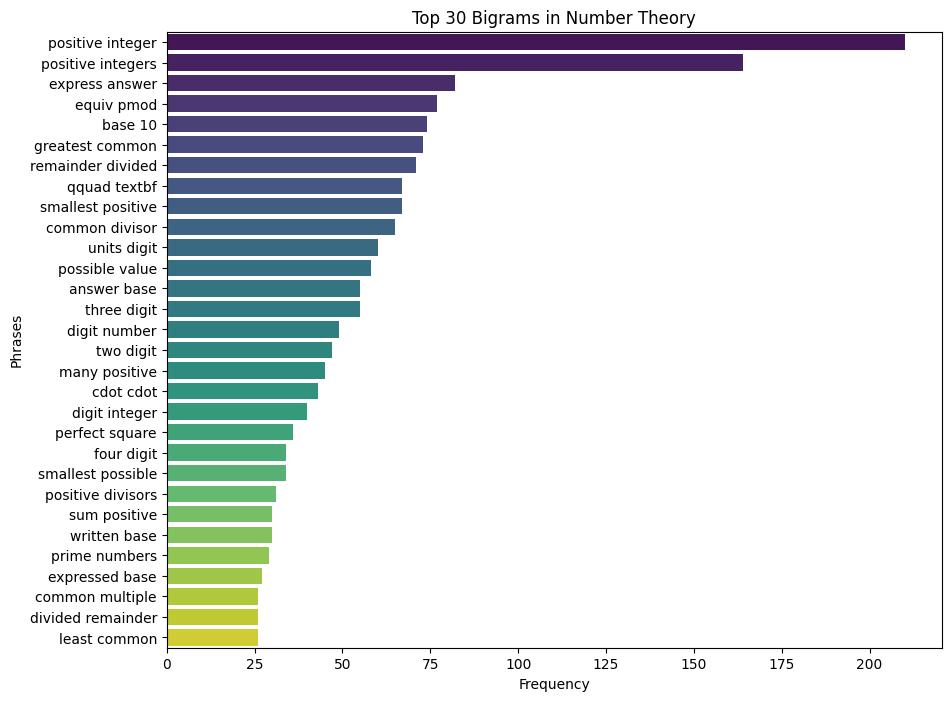

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2281160583.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")  # Corrected x and y keyword arguments


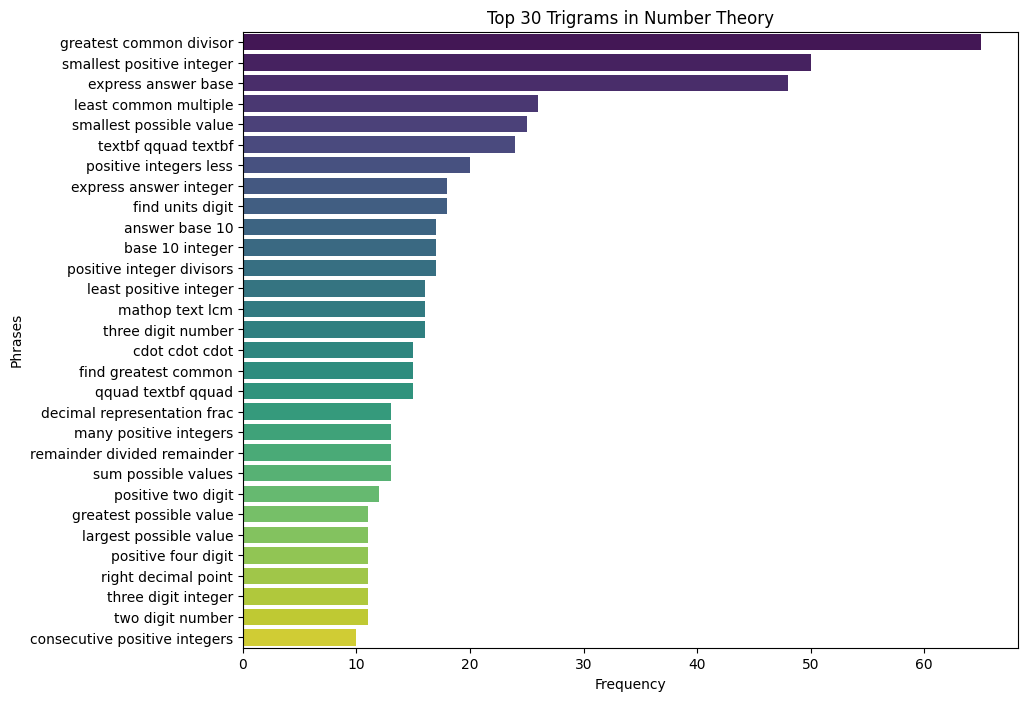

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

# Ensure NLTK stop words are available
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # Convert set to list

# Load your data (Make sure to adjust the path to where your dataset is located)
# data = pd.read_csv('path_to_your_data.csv')

# Assuming 'problem' column contains the text and 'type' column contains categories like 'Number Theory'
number_theory_data = data[data['type'] == 'Number Theory']['problem']

# Initialize CountVectorizer for unigrams, bigrams, and trigrams
vectorizer_words = CountVectorizer(stop_words=stop_words, ngram_range=(1,1))
vectorizer_bigrams = CountVectorizer(stop_words=stop_words, ngram_range=(2,2))
vectorizer_trigrams = CountVectorizer(stop_words=stop_words, ngram_range=(3,3))

# Fit and transform the data
words_counts = vectorizer_words.fit_transform(number_theory_data)
bigrams_counts = vectorizer_bigrams.fit_transform(number_theory_data)
trigrams_counts = vectorizer_trigrams.fit_transform(number_theory_data)

# Function to get top 30 features
def get_top_n_features(vectorizer, feature_counts):
    feature_names = vectorizer.get_feature_names_out()
    sum_features = feature_counts.sum(axis=0)
    sorted_features = sorted(zip(feature_names, sum_features.A1), key=lambda x: x[1], reverse=True)
    return sorted_features[:30]

# Retrieve top 30 unigrams, bigrams, and trigrams
top_words = get_top_n_features(vectorizer_words, words_counts)
top_bigrams = get_top_n_features(vectorizer_bigrams, bigrams_counts)
top_trigrams = get_top_n_features(vectorizer_trigrams, trigrams_counts)

# Plotting function
def plot_ngrams(ngrams, title):
    words, counts = zip(*ngrams)
    plt.figure(figsize=(10, 8))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")  # Corrected x and y keyword arguments
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Phrases')
    plt.show()

# Plotting top 30 unigrams, bigrams, and trigrams
plot_ngrams(top_words, "Top 30 Words in Number Theory")
plot_ngrams(top_bigrams, "Top 30 Bigrams in Number Theory")
plot_ngrams(top_trigrams, "Top 30 Trigrams in Number Theory")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gapar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processing: Algebra


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


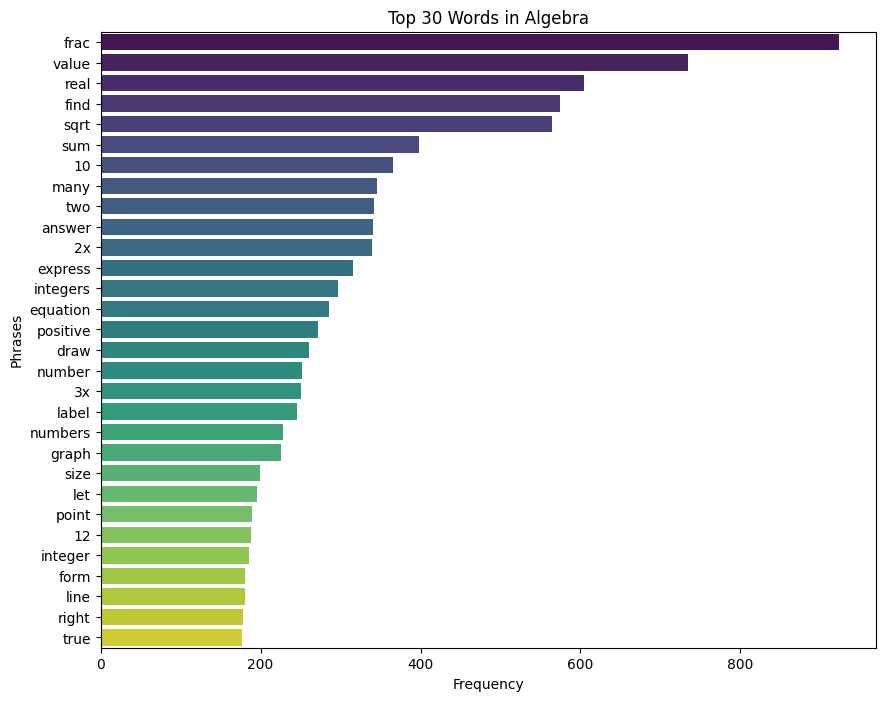

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


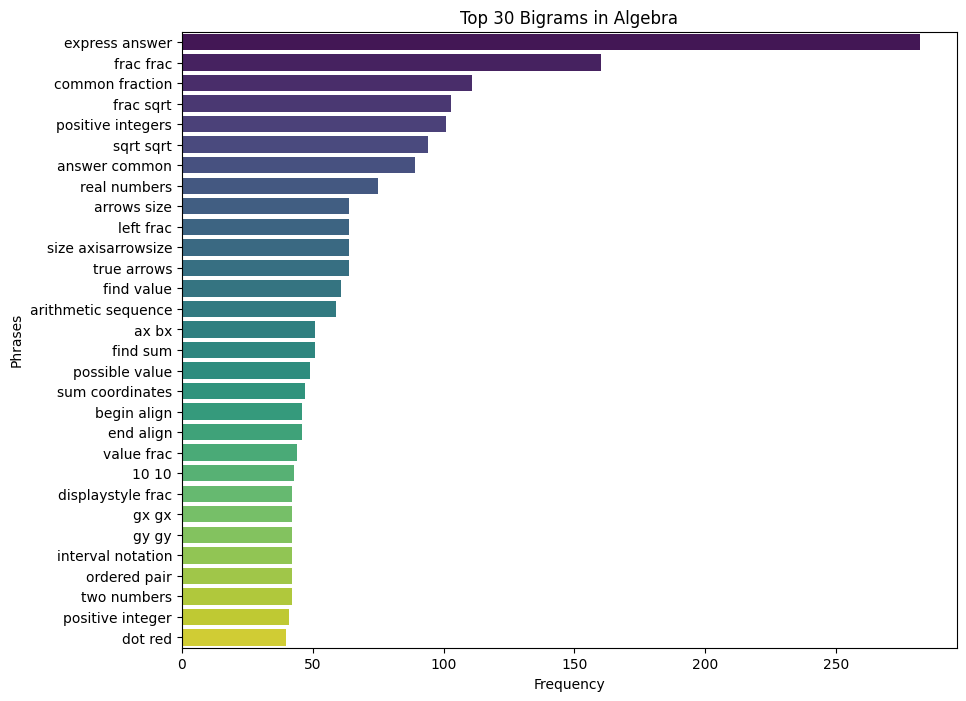

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


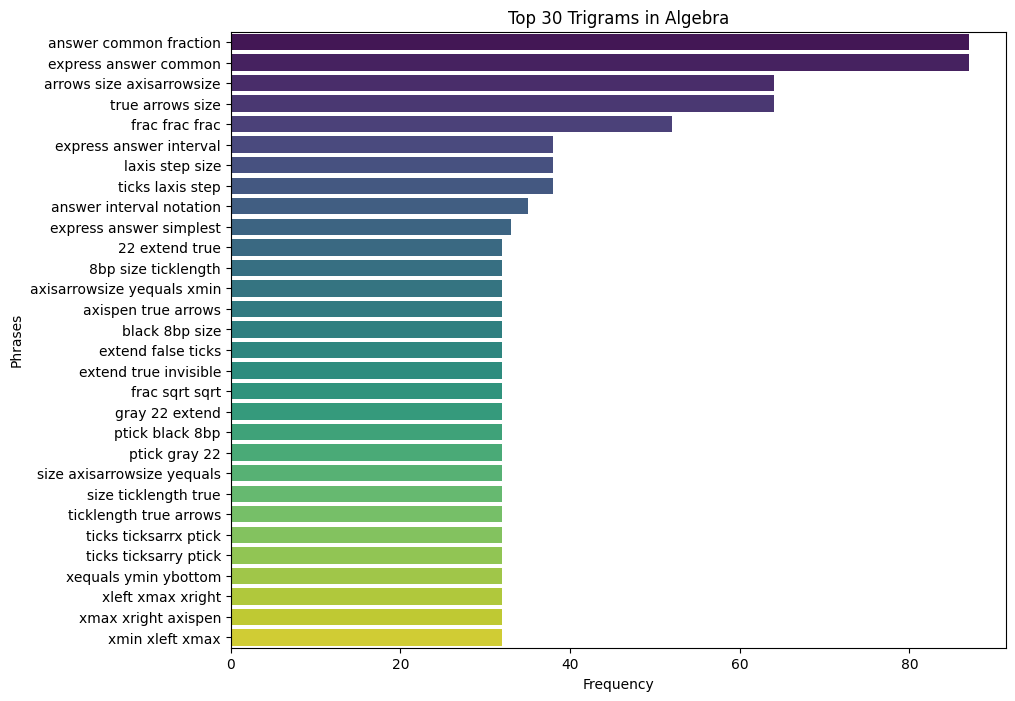

Processing: Counting & Probability


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


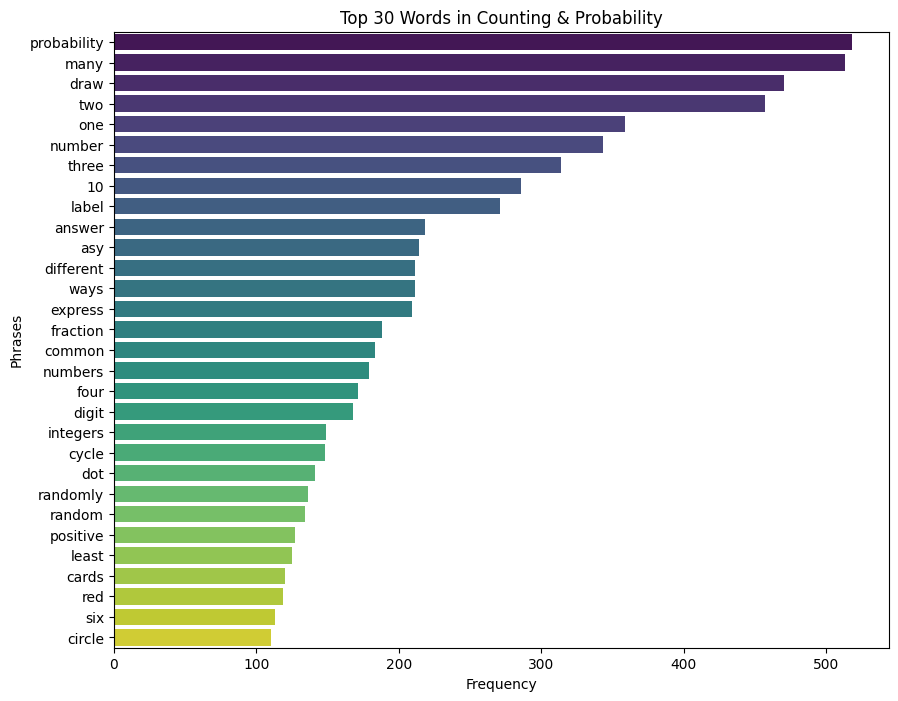

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


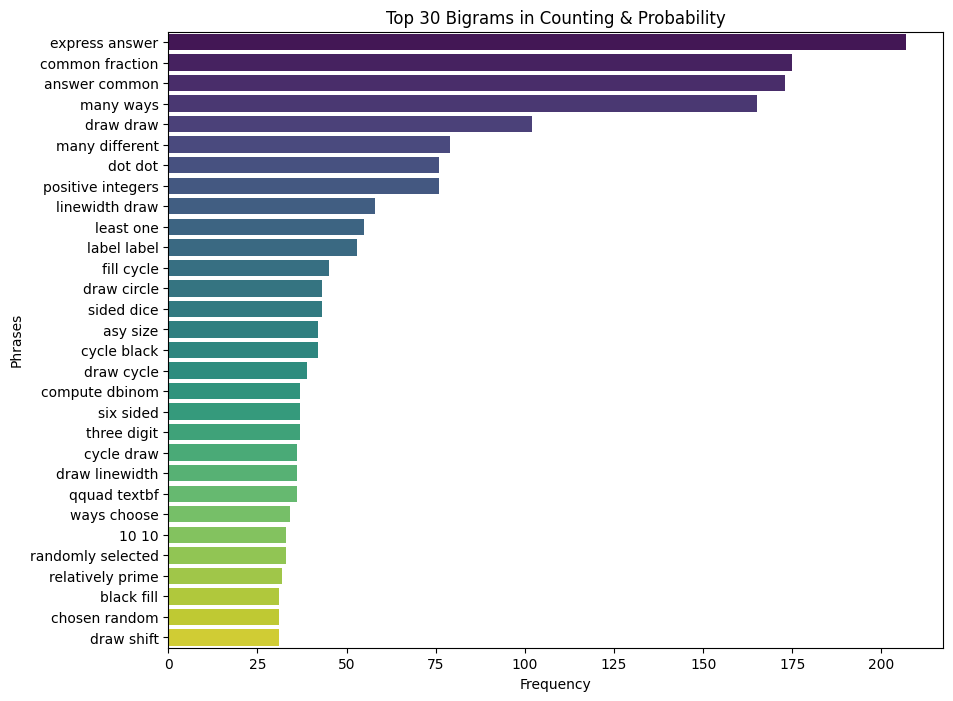

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


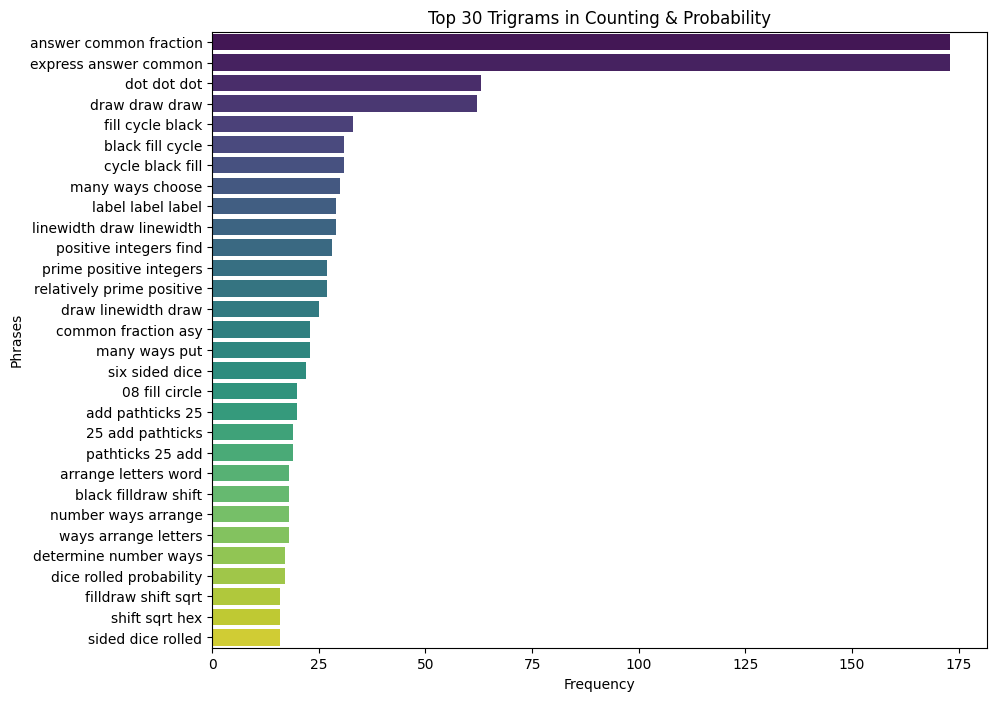

Processing: Geometry


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


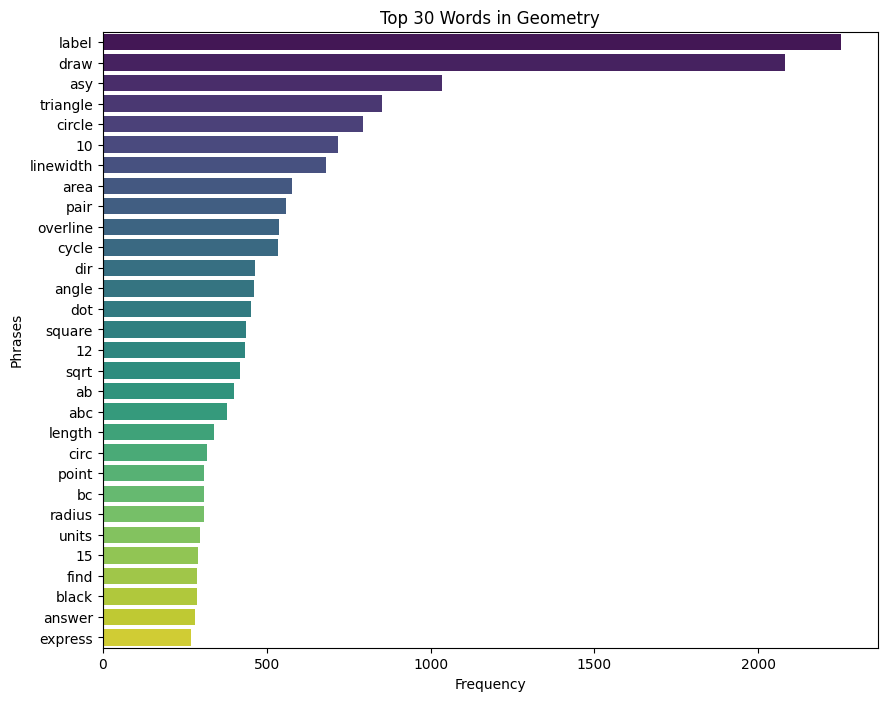

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


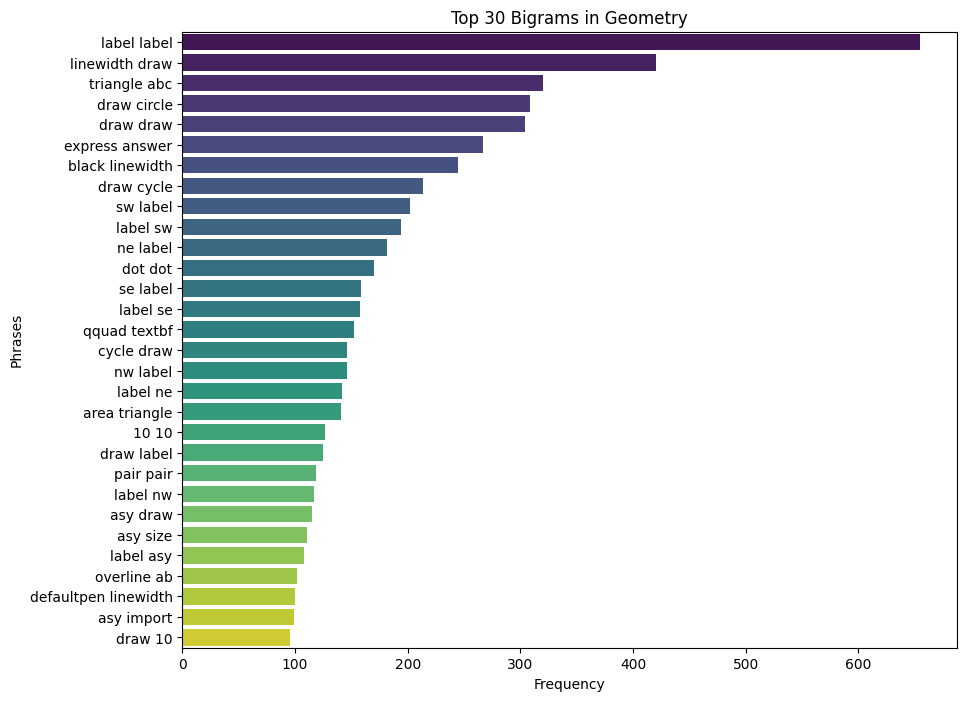

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


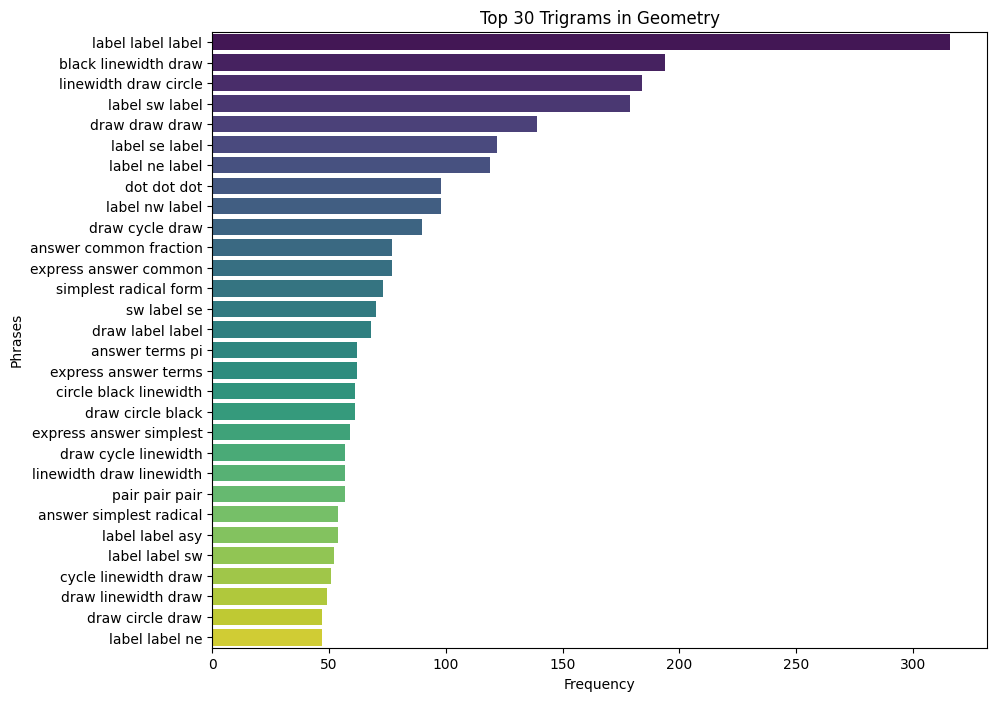

Processing: Intermediate Algebra


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


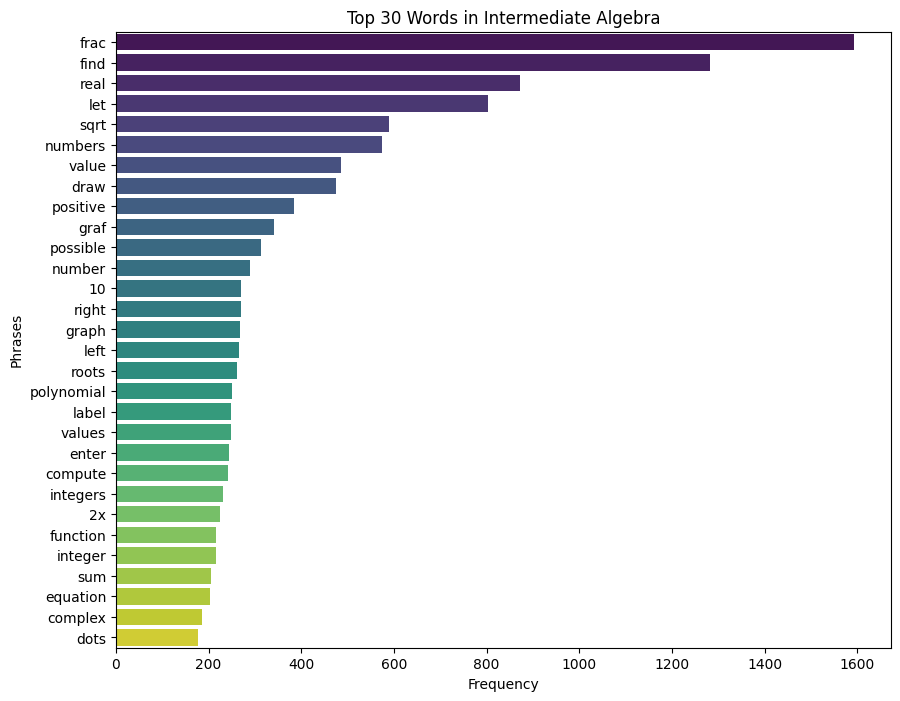

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


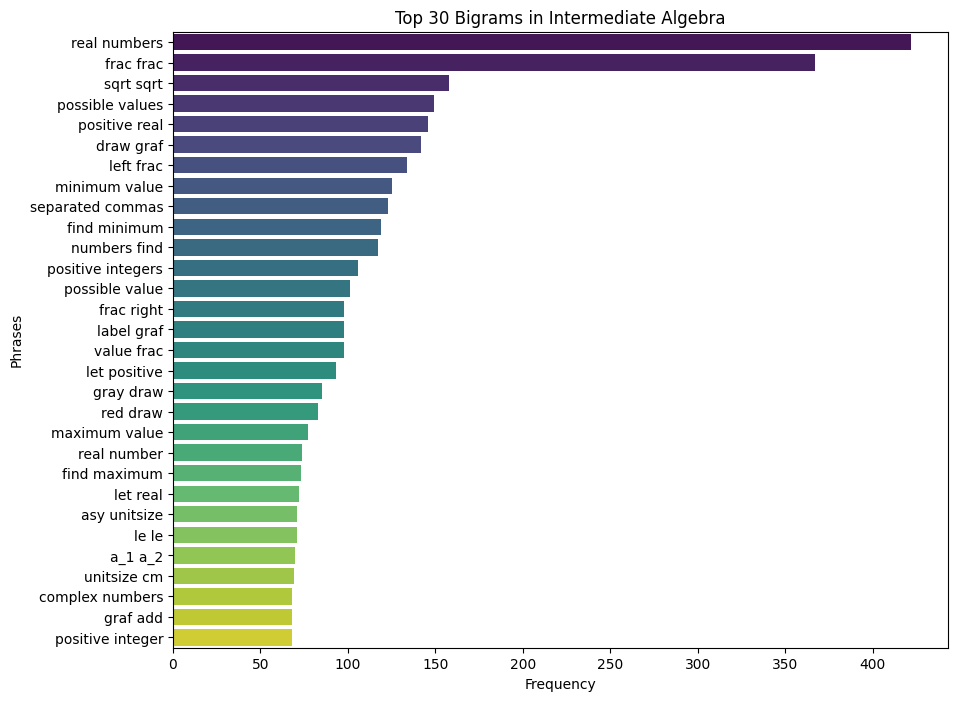

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


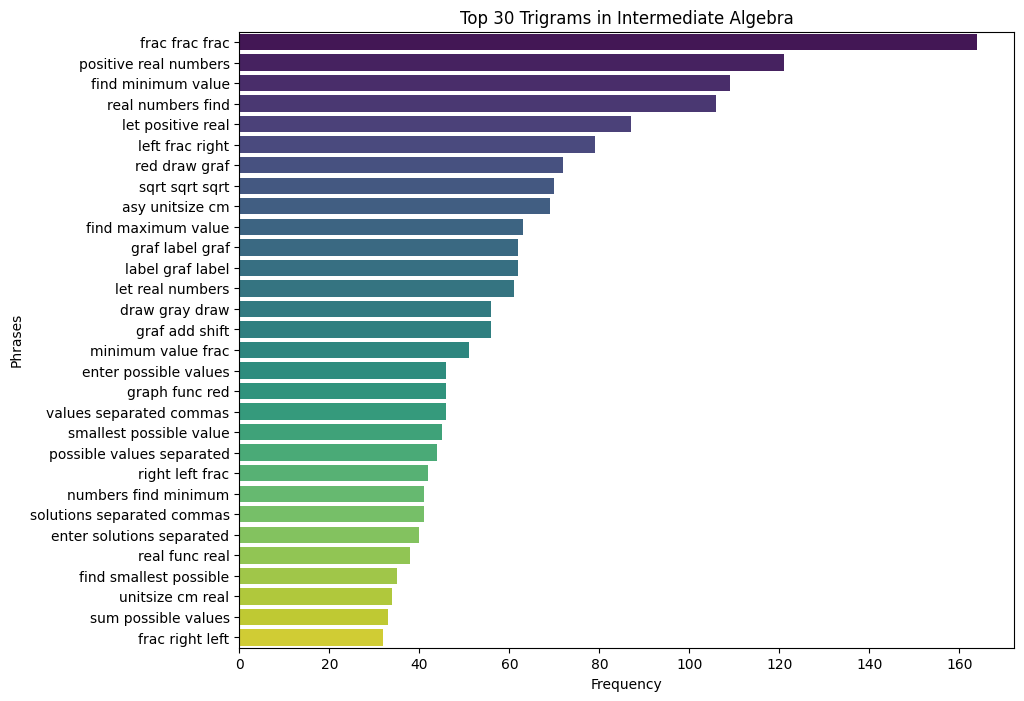

Processing: Number Theory


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


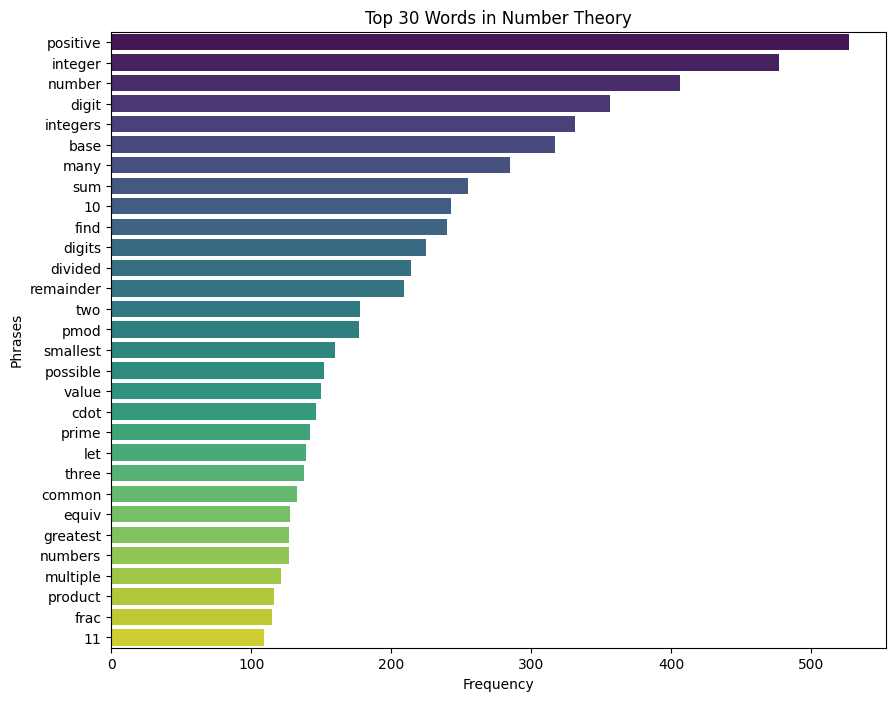

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


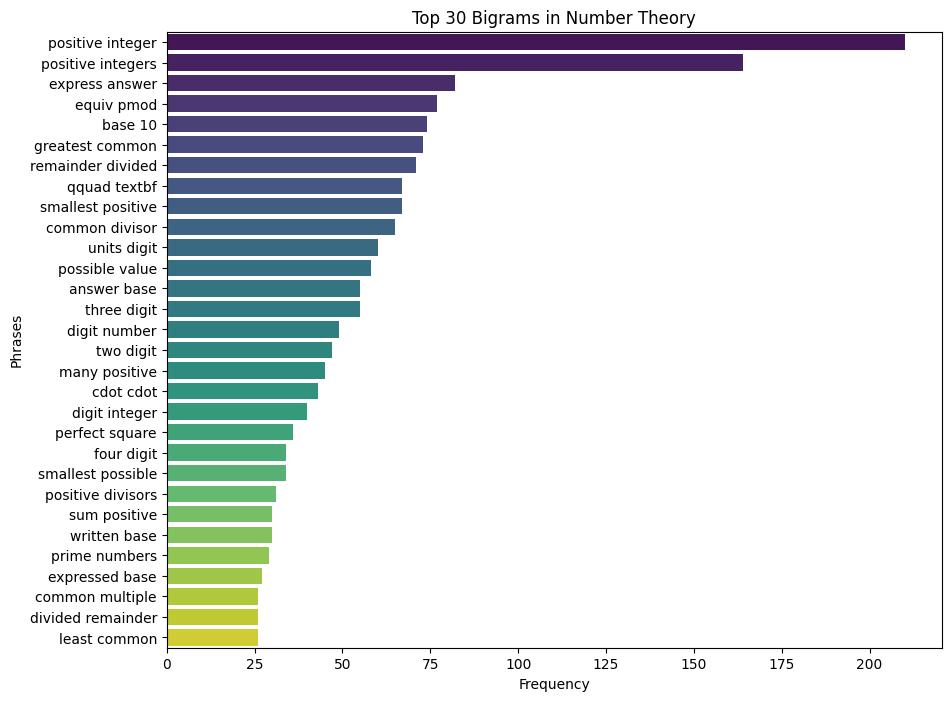

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


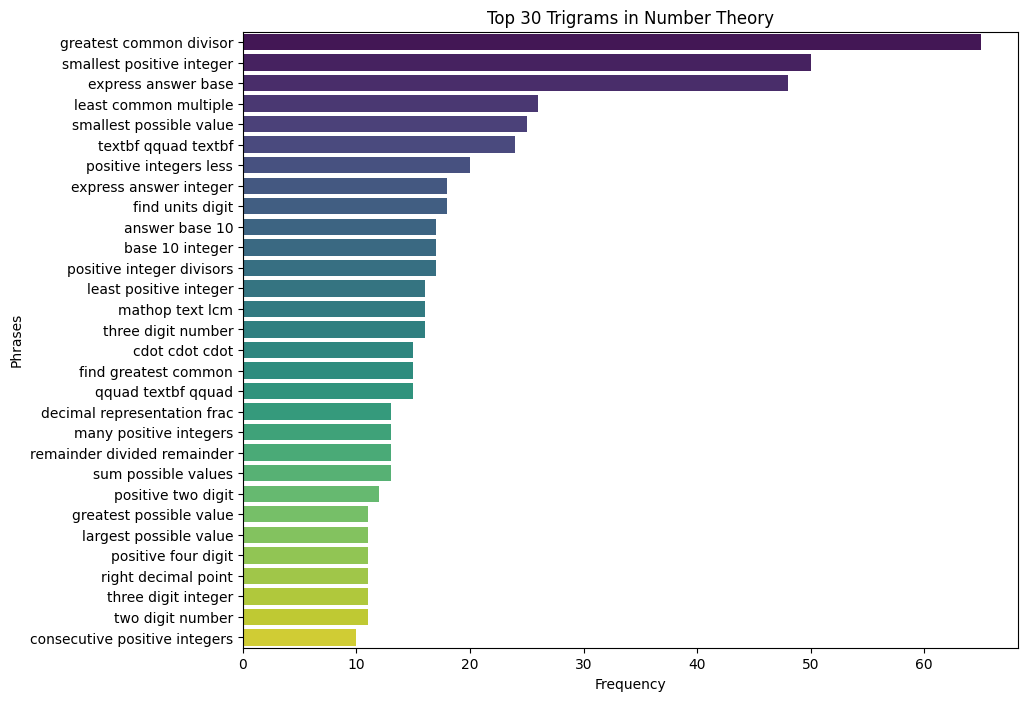

Processing: Prealgebra


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


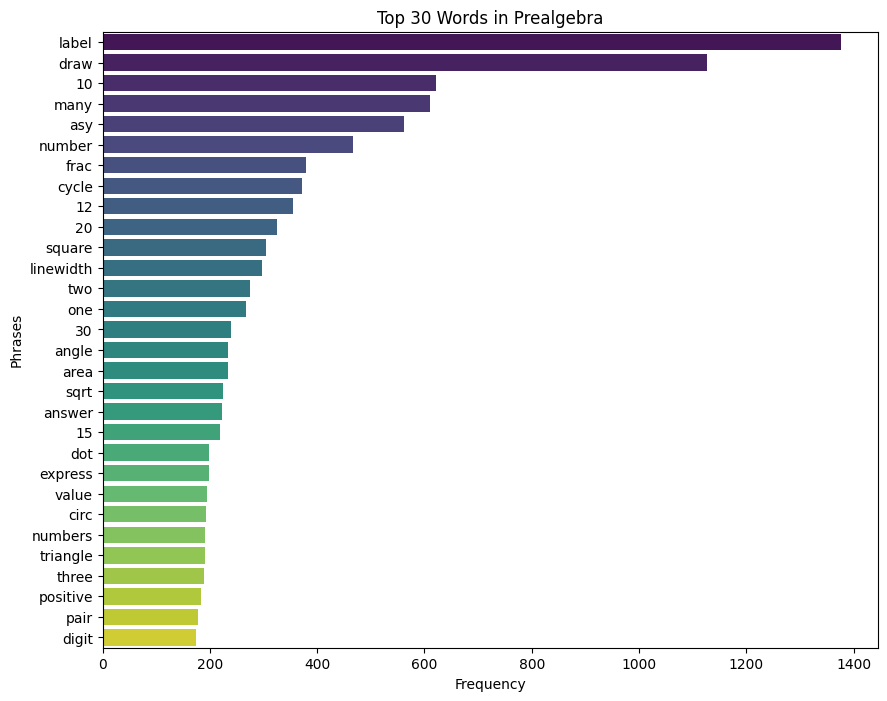

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


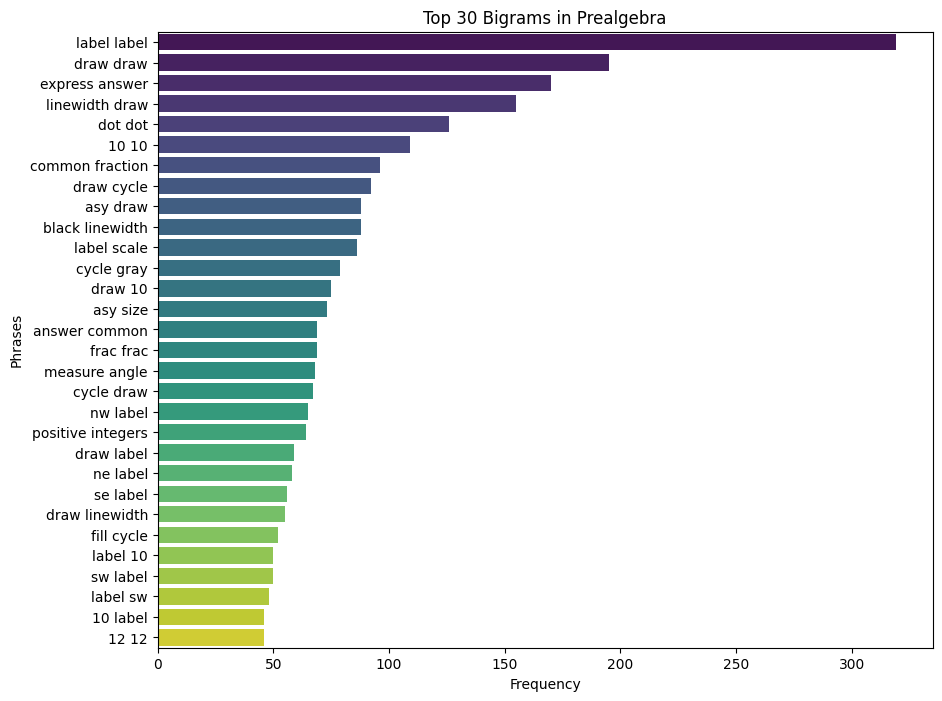

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


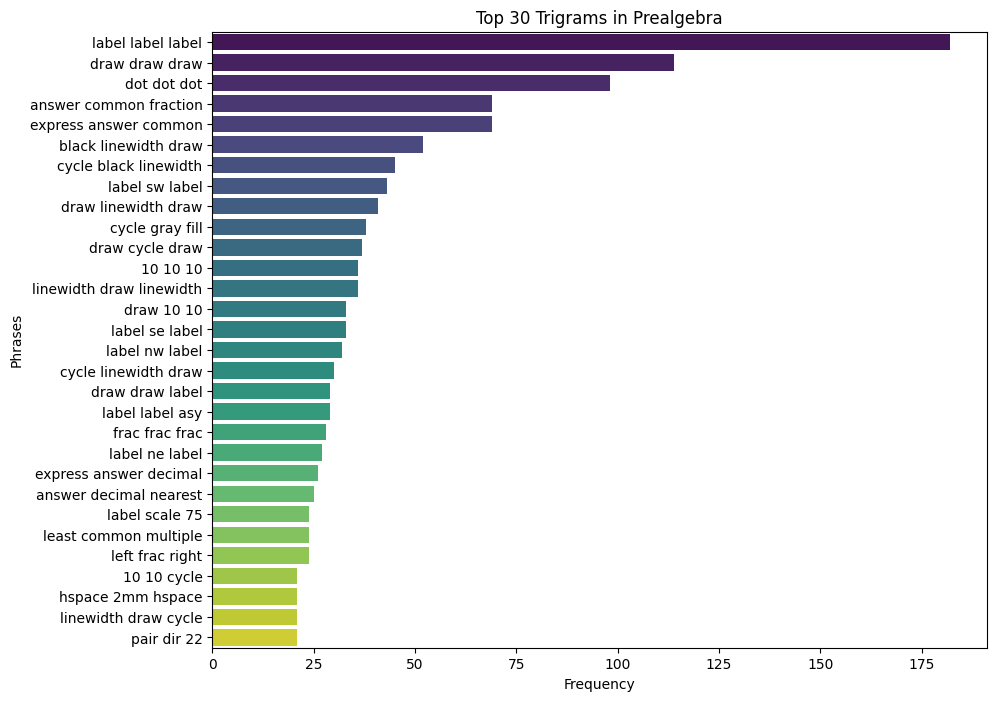

Processing: Precalculus


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


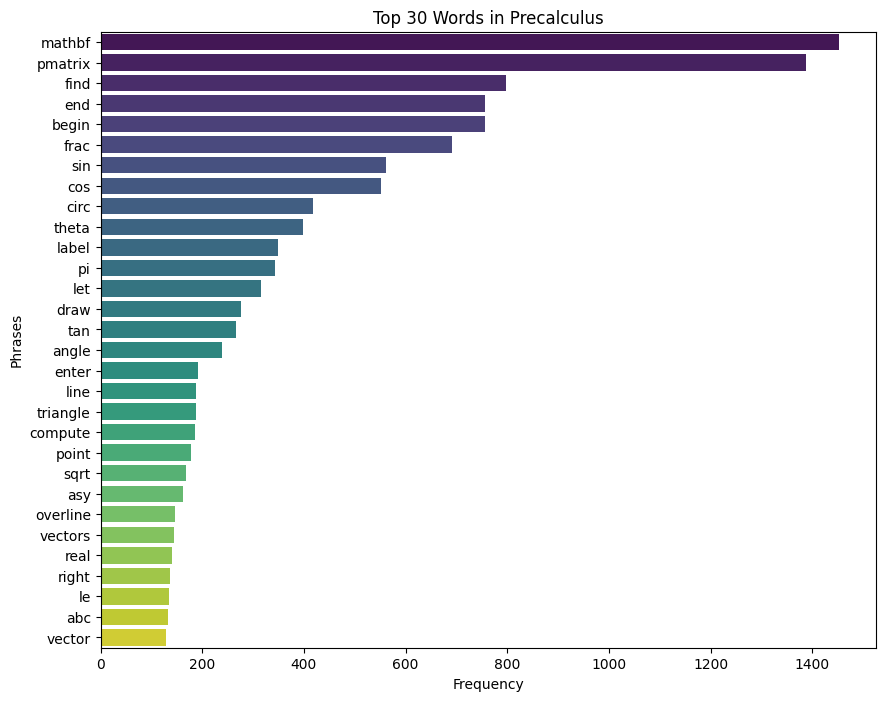

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


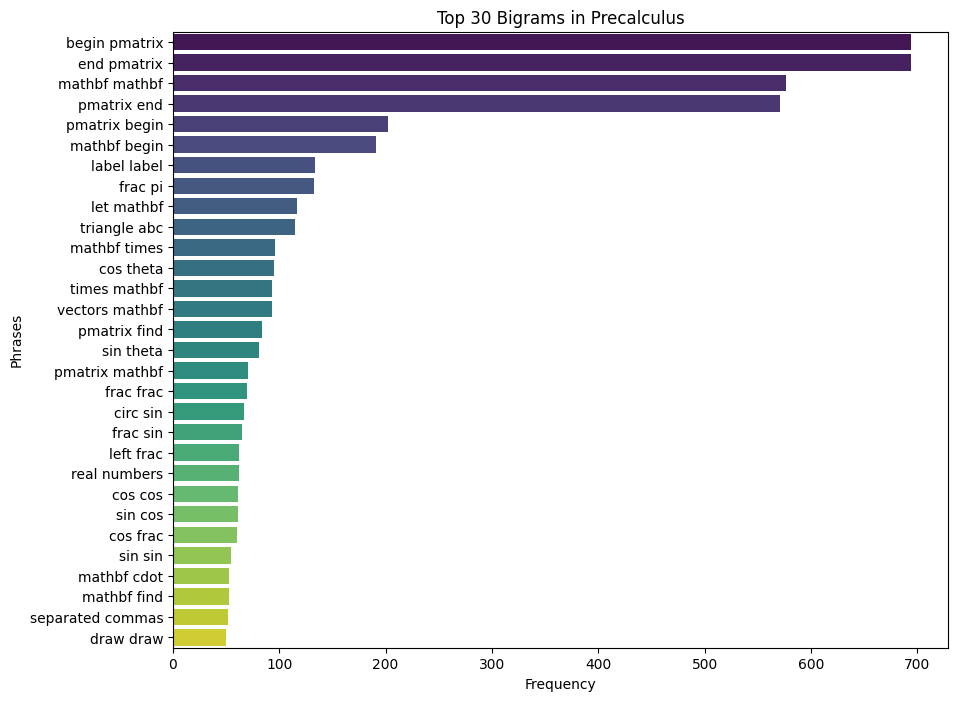

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\851550042.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


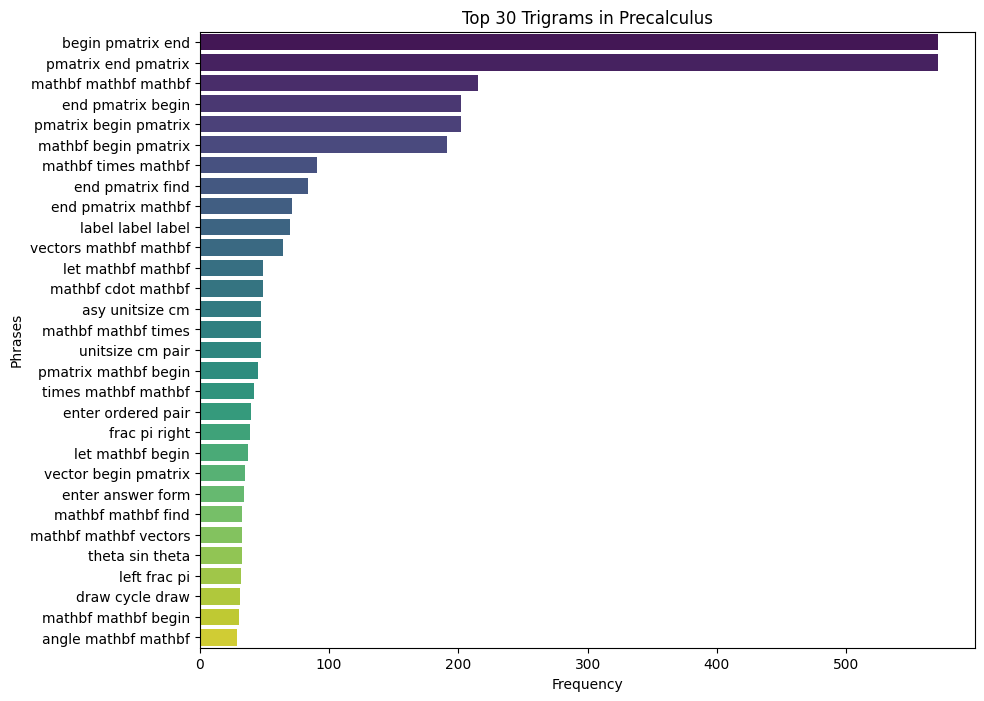

Processing: nan


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

# Ensure NLTK stop words are available
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # Convert set to list

# Load your data (Make sure to adjust the path to where your dataset is located)
# data = pd.read_csv('path_to_your_data.csv')

# Retrieve all unique problem types
problem_types = data['type'].unique()

# Initialize CountVectorizer for unigrams, bigrams, and trigrams
vectorizer_words = CountVectorizer(stop_words=stop_words, ngram_range=(1,1))
vectorizer_bigrams = CountVectorizer(stop_words=stop_words, ngram_range=(2,2))
vectorizer_trigrams = CountVectorizer(stop_words=stop_words, ngram_range=(3,3))

# Function to get top 30 features
def get_top_n_features(vectorizer, feature_counts):
    feature_names = vectorizer.get_feature_names_out()
    sum_features = feature_counts.sum(axis=0)
    sorted_features = sorted(zip(feature_names, sum_features.A1), key=lambda x: x[1], reverse=True)
    return sorted_features[:30]

# Plotting function
def plot_ngrams(ngrams, title):
    words, counts = zip(*ngrams)
    plt.figure(figsize=(10, 8))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Phrases')
    plt.show()

# Loop through each problem type
for problem_type in problem_types:
    print(f"Processing: {problem_type}")
    specific_type_data = data[data['type'] == problem_type]['problem']
    
    # Fit and transform the data for each type
    words_counts = vectorizer_words.fit_transform(specific_type_data)
    bigrams_counts = vectorizer_bigrams.fit_transform(specific_type_data)
    trigrams_counts = vectorizer_trigrams.fit_transform(specific_type_data)
    
    # Retrieve and plot top 30 unigrams, bigrams, and trigrams
    top_words = get_top_n_features(vectorizer_words, words_counts)
    top_bigrams = get_top_n_features(vectorizer_bigrams, bigrams_counts)
    top_trigrams = get_top_n_features(vectorizer_trigrams, trigrams_counts)
    
    plot_ngrams(top_words, f"Top 30 Words in {problem_type}")
    plot_ngrams(top_bigrams, f"Top 30 Bigrams in {problem_type}")
    plot_ngrams(top_trigrams, f"Top 30 Trigrams in {problem_type}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gapar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processing: Algebra


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


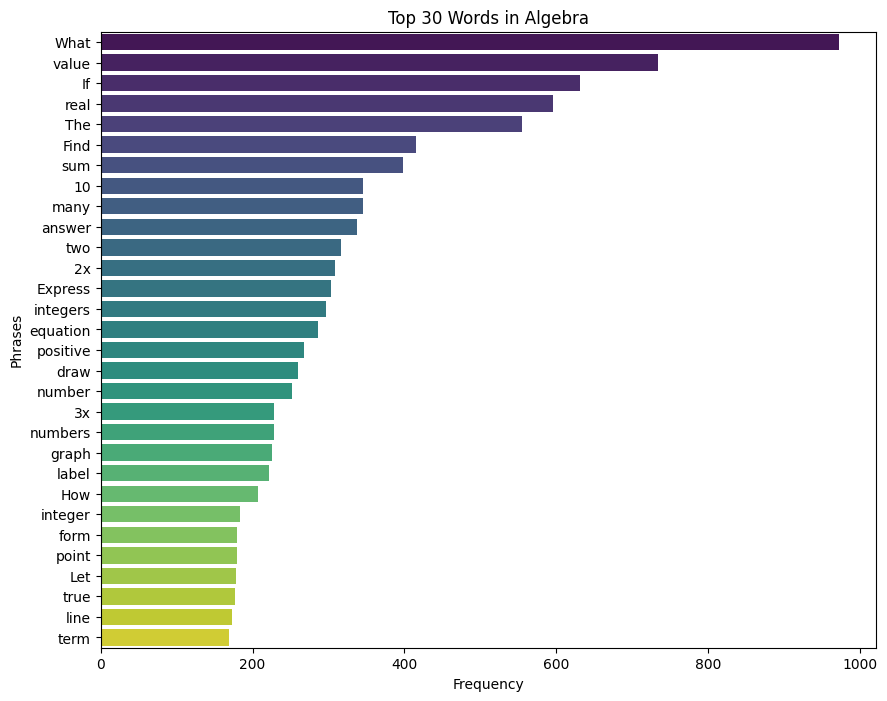

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


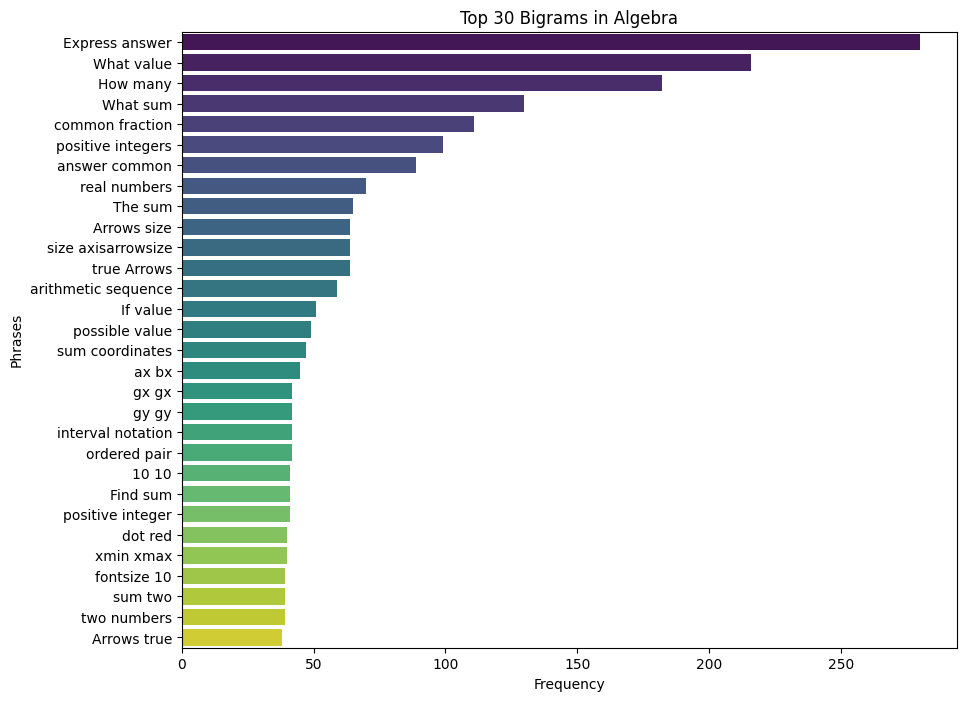

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


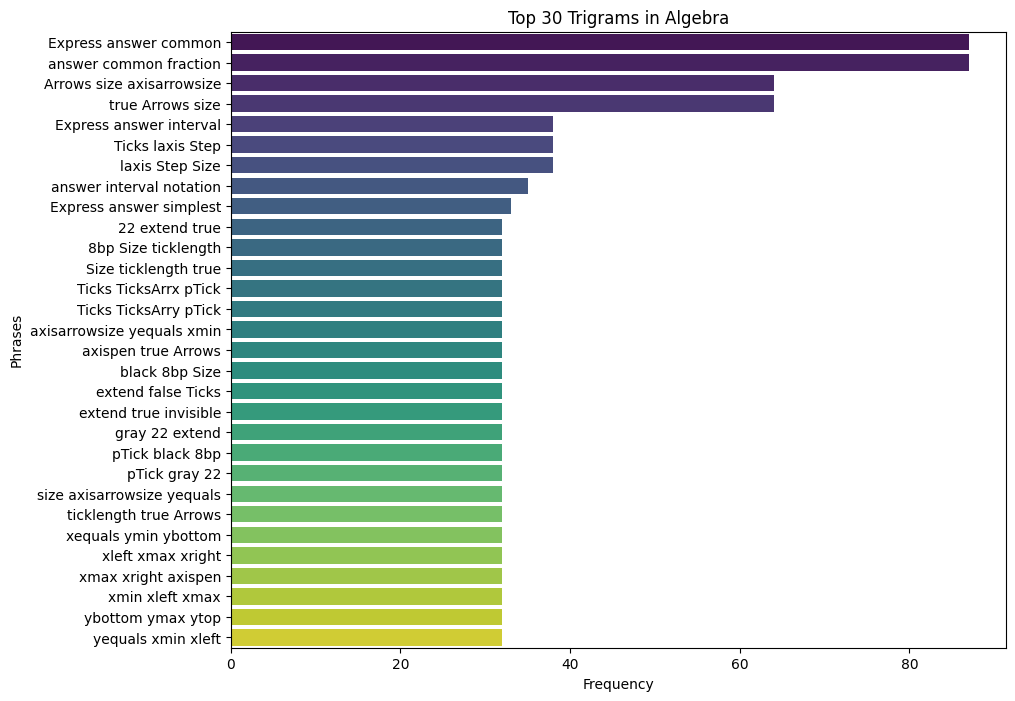

Processing: Counting & Probability


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


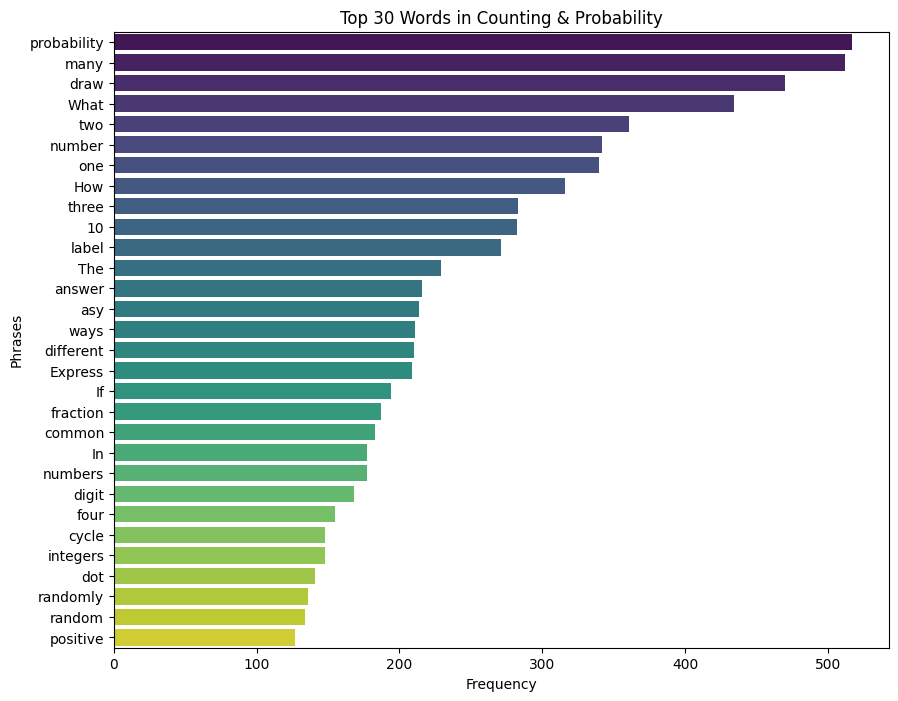

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


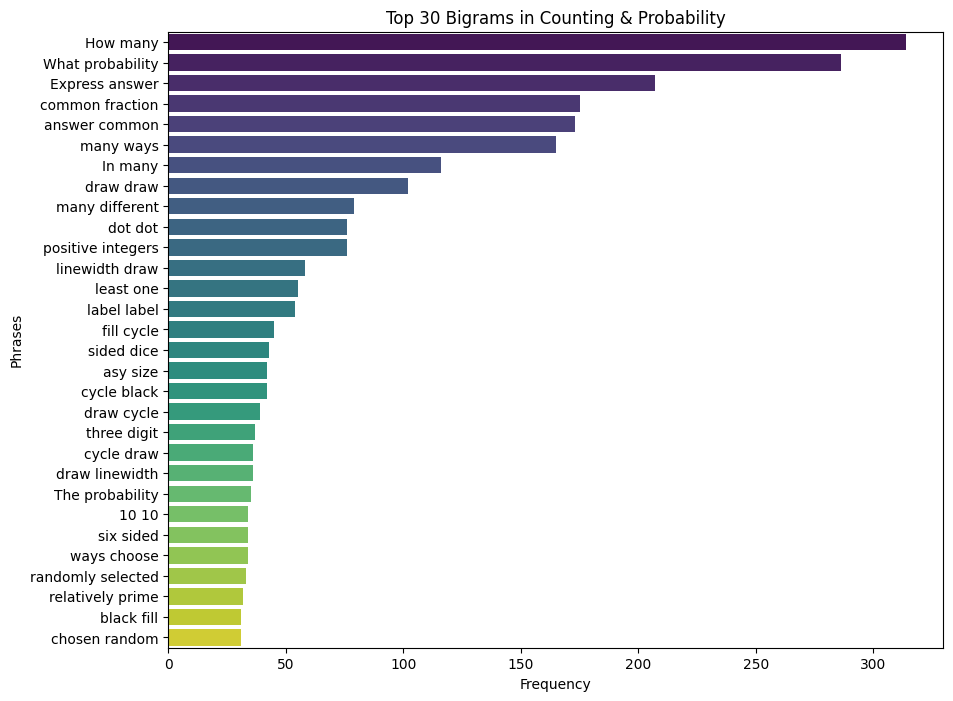

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


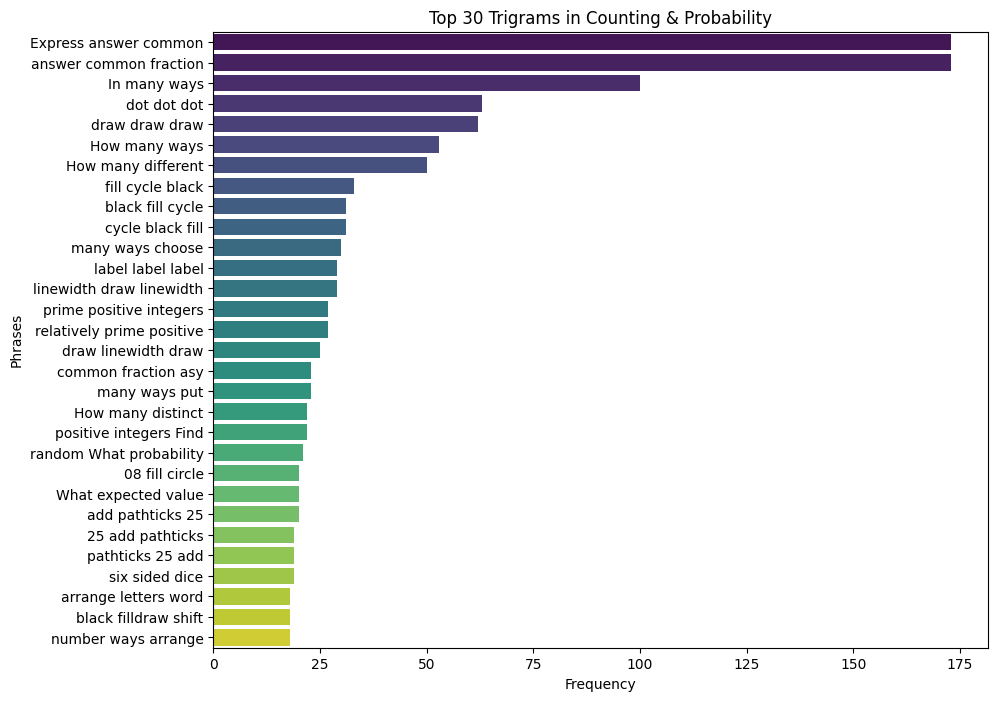

Processing: Geometry


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


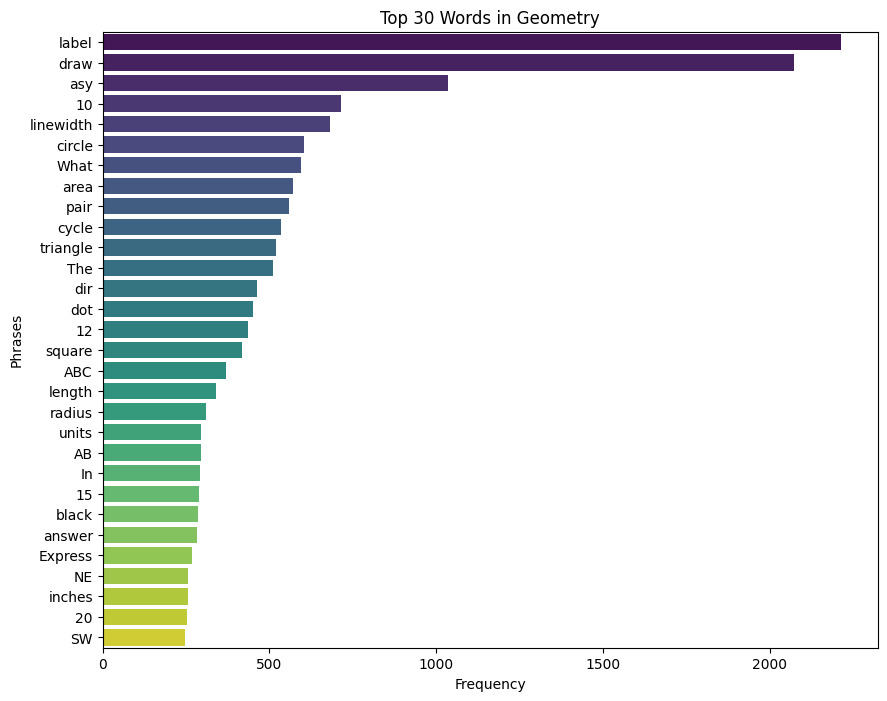

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


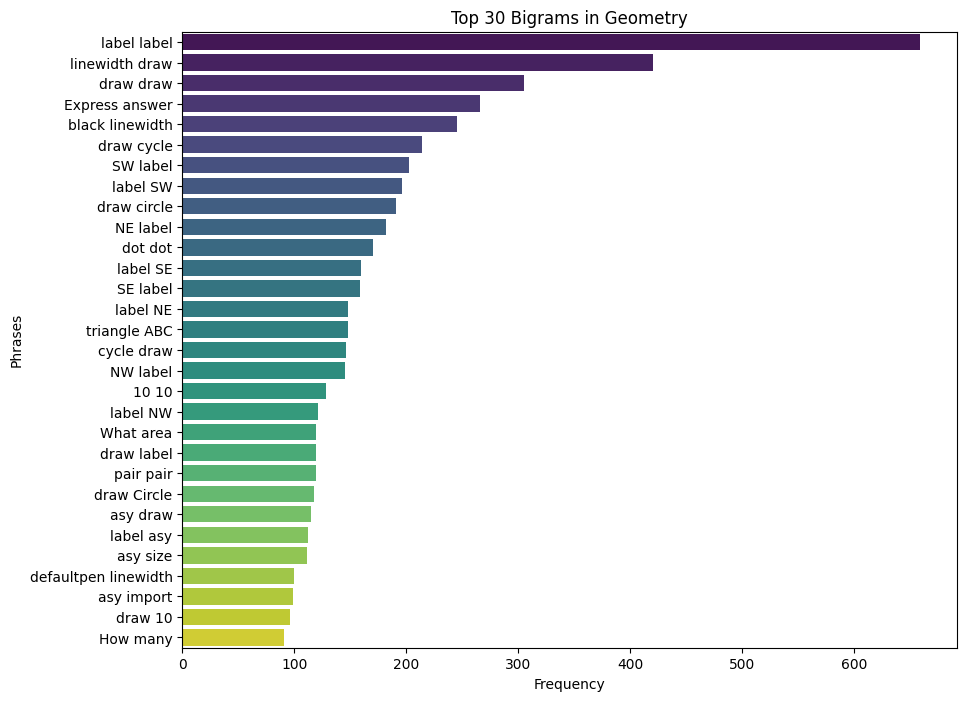

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


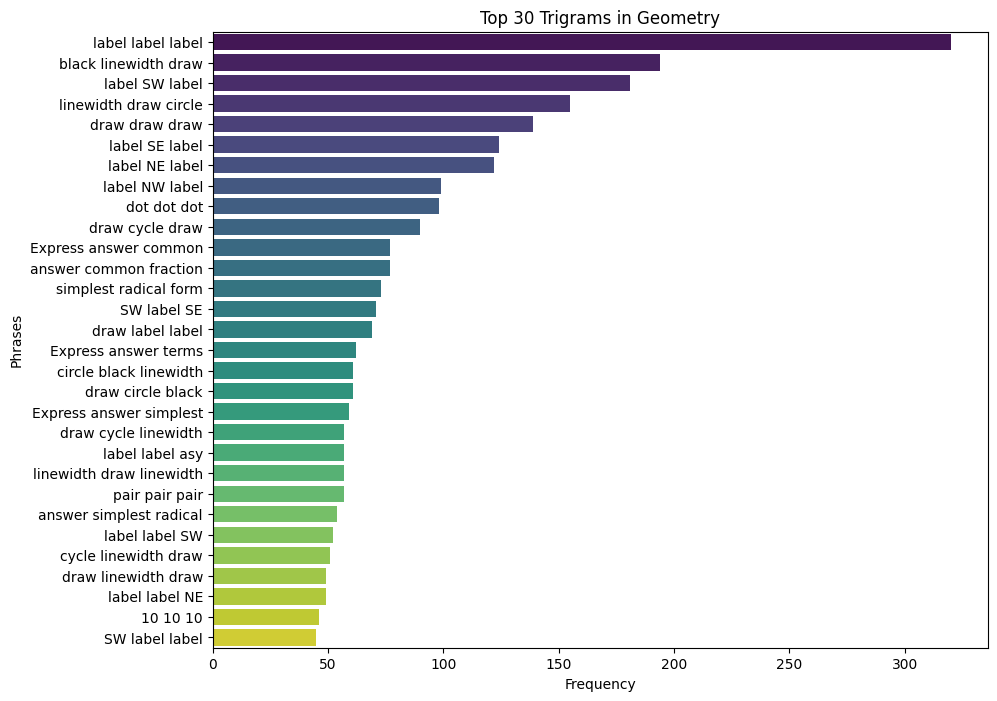

Processing: Intermediate Algebra


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


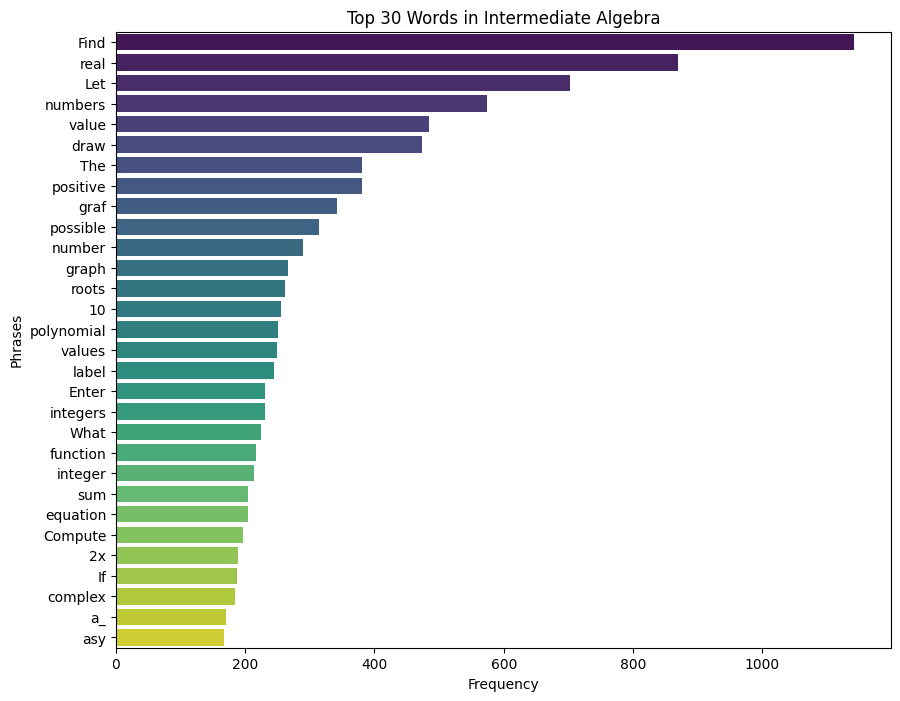

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


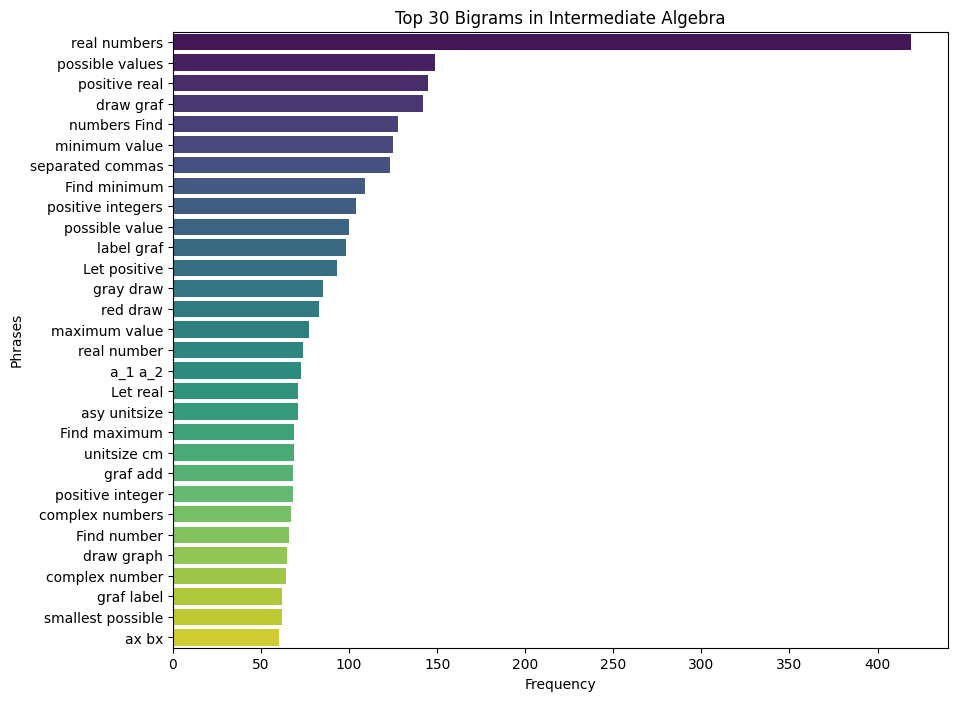

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


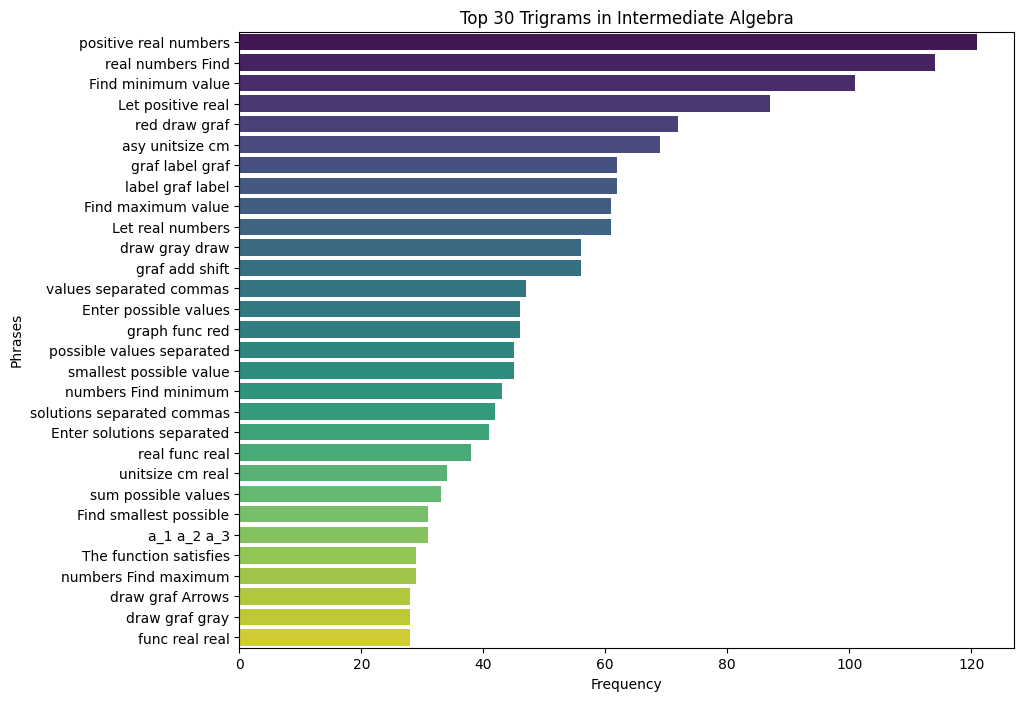

Processing: Number Theory


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


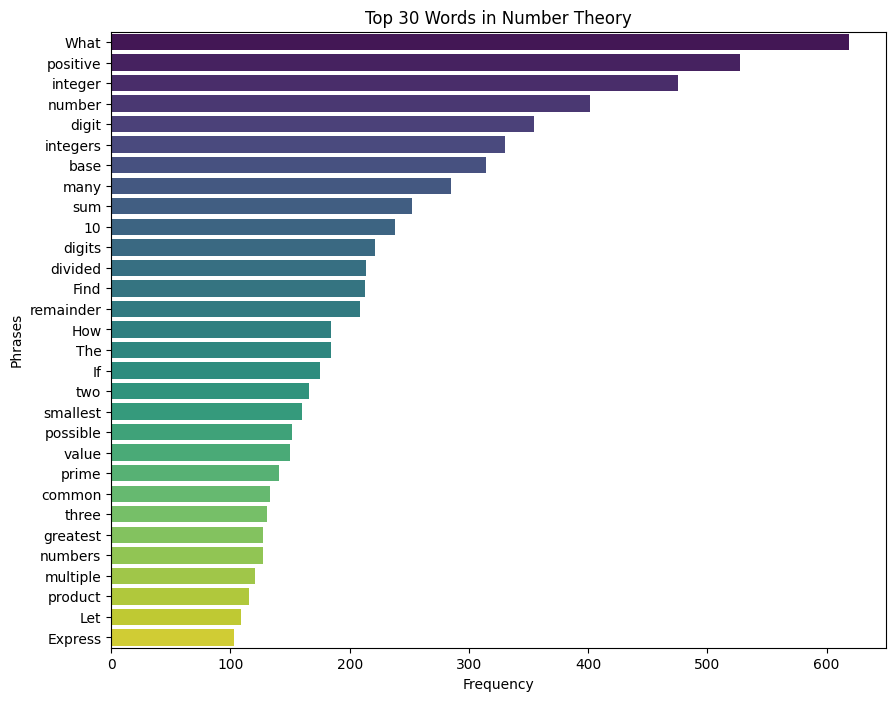

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


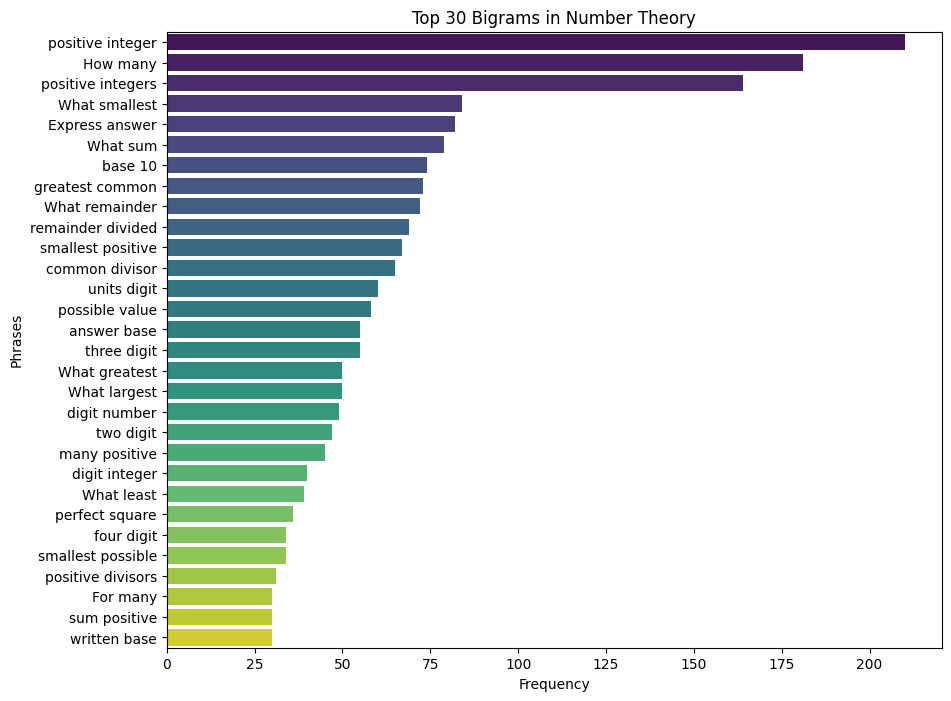

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


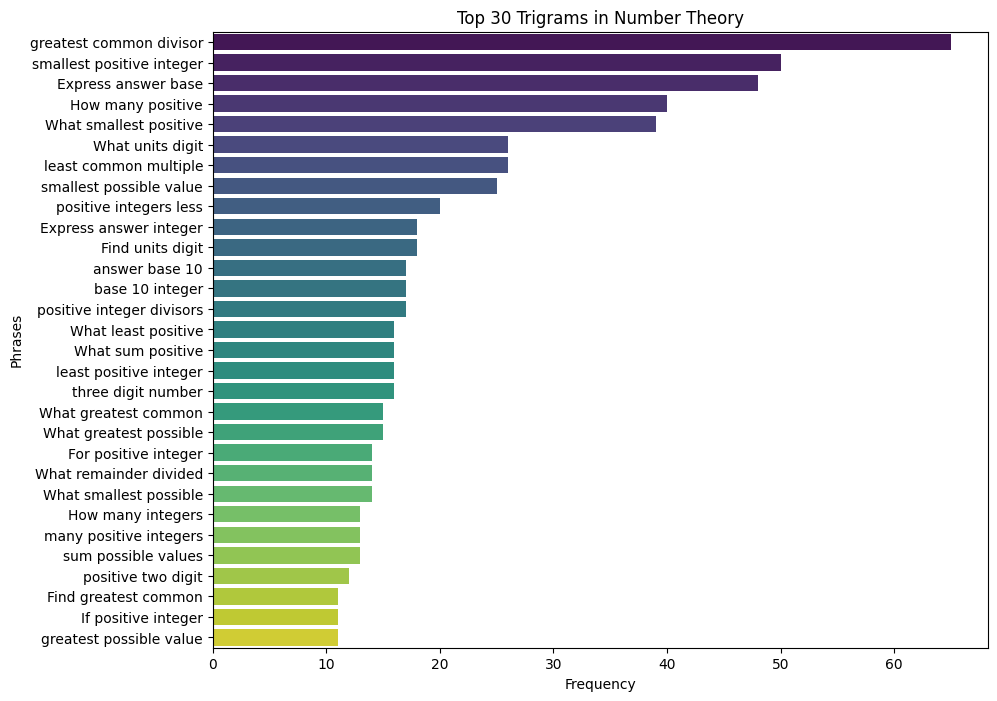

Processing: Prealgebra


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


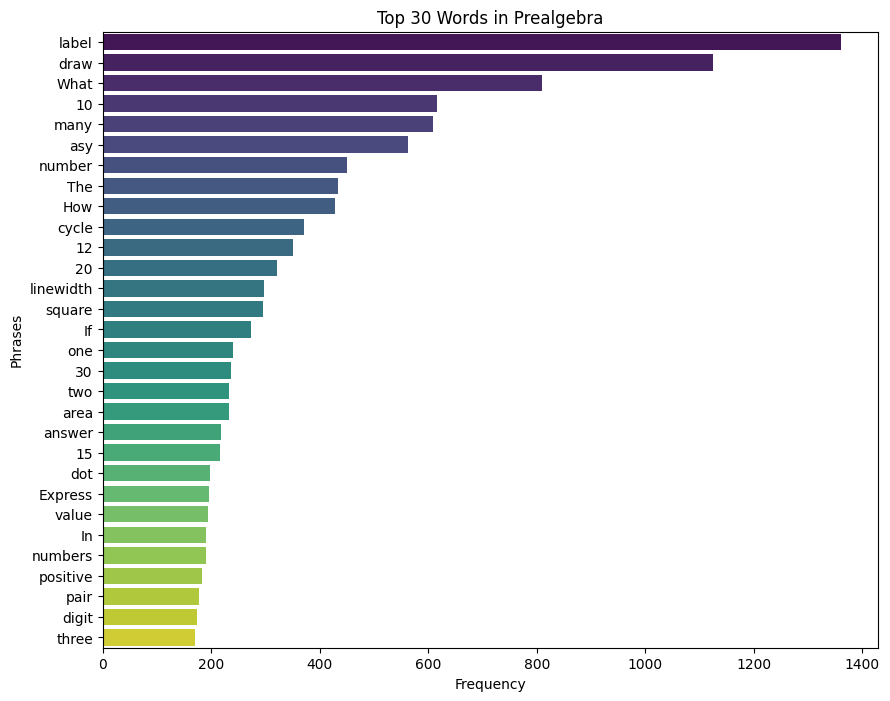

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


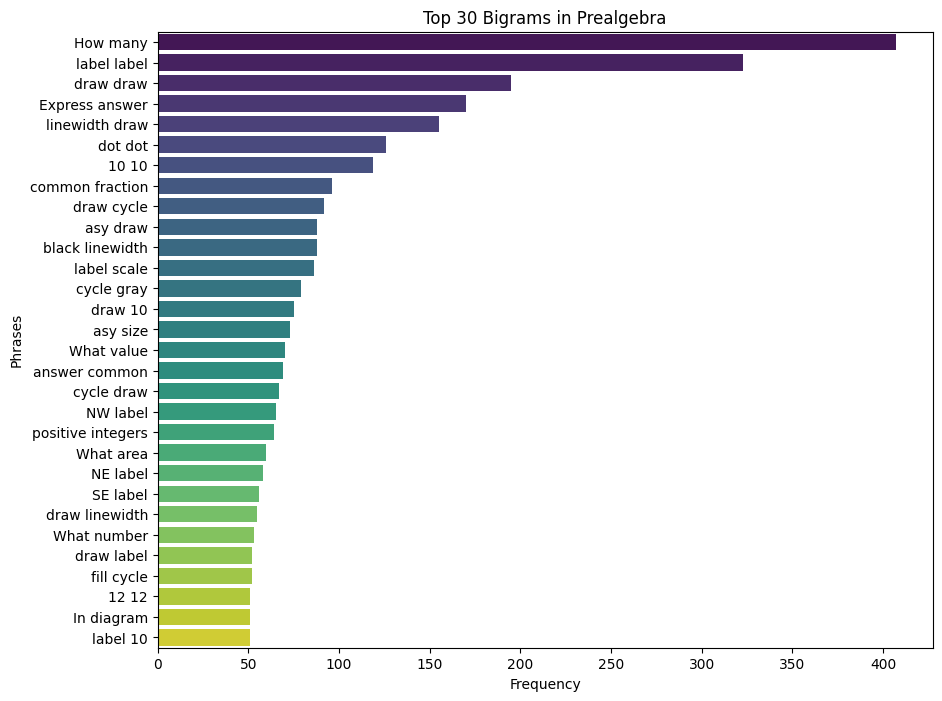

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


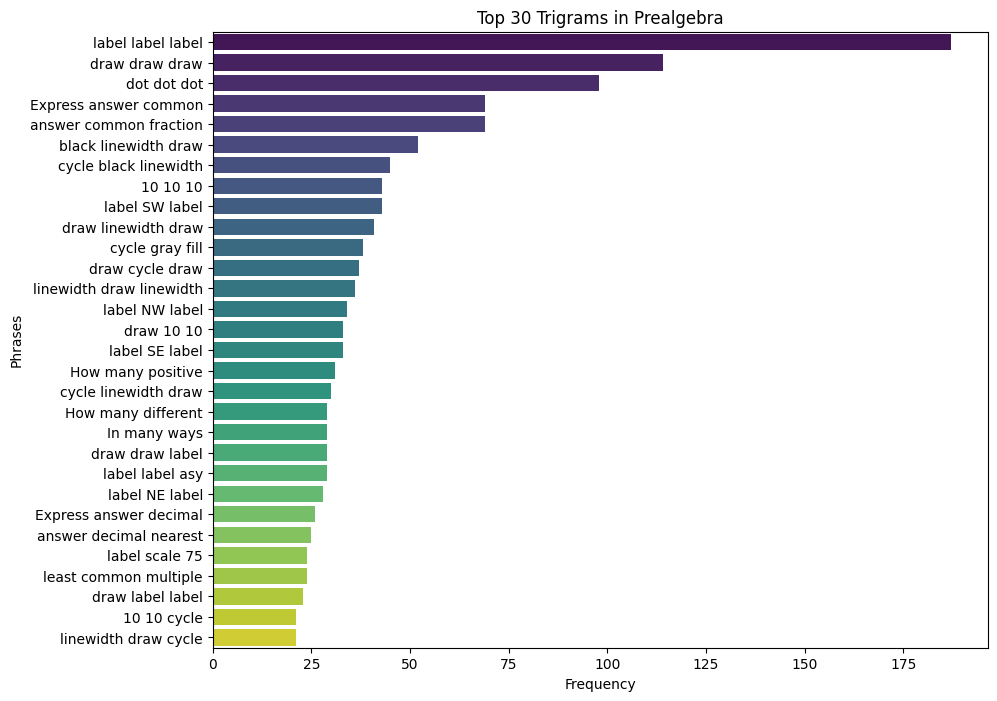

Processing: Precalculus


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


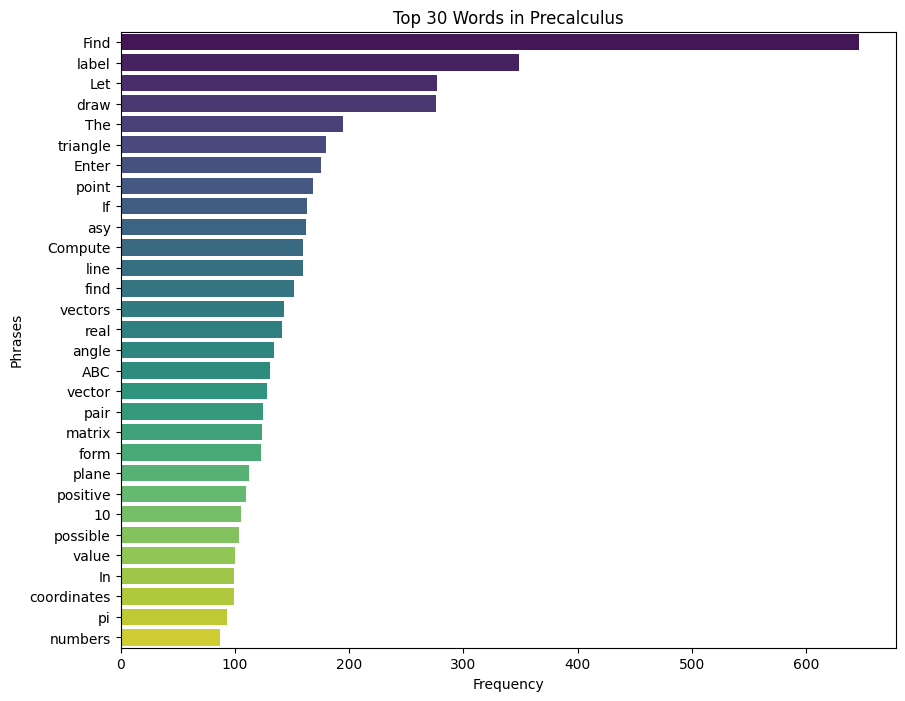

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


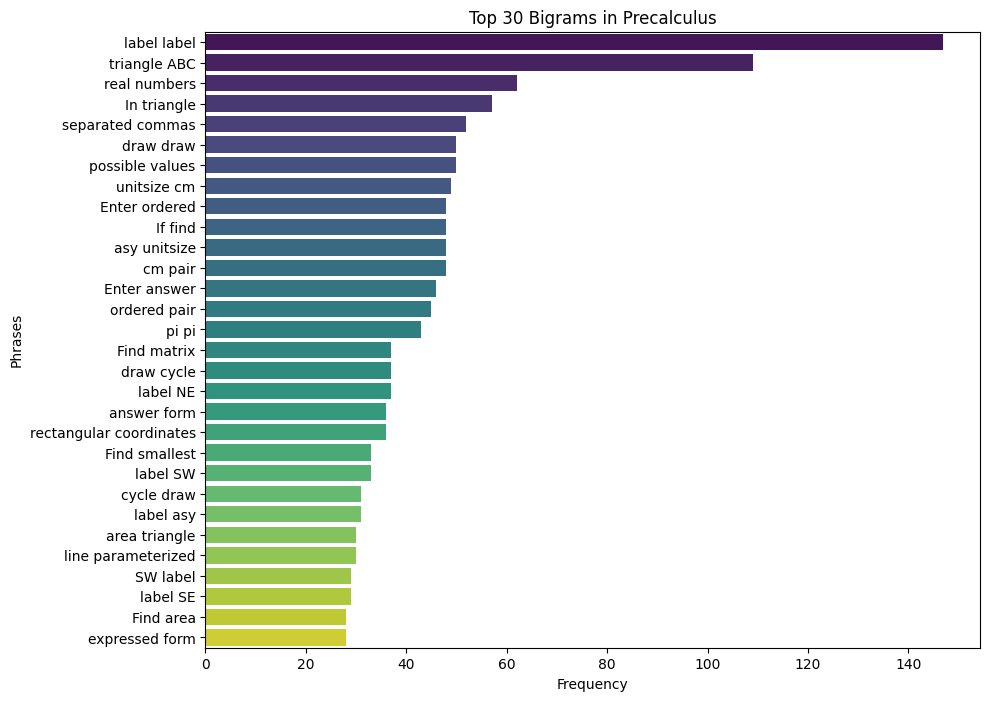

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\2376405142.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


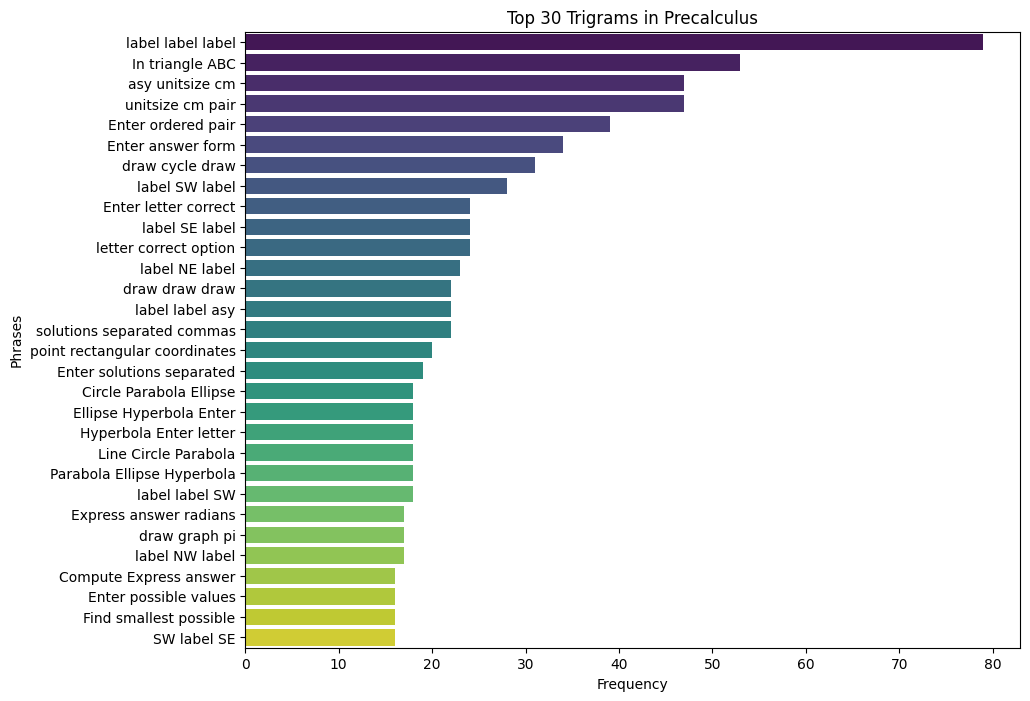

Processing: nan


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import re

# Ensure NLTK stop words are available
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # Convert set to list

# Define a preprocessing function to remove LaTeX commands
def preprocess_text(text):
    # Remove LaTeX-specific commands (e.g., \frac{}{}, \text{}, \sqrt{}, etc.)
    text = re.sub(r'\\[a-zA-Z]+(\{[^}]*\})?', '', text)
    return text

# Load your data (Make sure to adjust the path to where your dataset is located)
# data = pd.read_csv('path_to_your_data.csv')

# Retrieve all unique problem types
problem_types = data['type'].unique()

# Initialize CountVectorizer for unigrams, bigrams, and trigrams with preprocessing
vectorizer_words = CountVectorizer(stop_words=stop_words, ngram_range=(1,1), preprocessor=preprocess_text)
vectorizer_bigrams = CountVectorizer(stop_words=stop_words, ngram_range=(2,2), preprocessor=preprocess_text)
vectorizer_trigrams = CountVectorizer(stop_words=stop_words, ngram_range=(3,3), preprocessor=preprocess_text)

# Function to get top 30 features
def get_top_n_features(vectorizer, feature_counts):
    feature_names = vectorizer.get_feature_names_out()
    sum_features = feature_counts.sum(axis=0)
    sorted_features = sorted(zip(feature_names, sum_features.A1), key=lambda x: x[1], reverse=True)
    return sorted_features[:30]

# Plotting function
def plot_ngrams(ngrams, title):
    words, counts = zip(*ngrams)
    plt.figure(figsize=(10, 8))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Phrases')
    plt.show()

# Loop through each problem type
for problem_type in problem_types:
    print(f"Processing: {problem_type}")
    specific_type_data = data[data['type'] == problem_type]['problem']
    
    # Fit and transform the data for each type
    words_counts = vectorizer_words.fit_transform(specific_type_data)
    bigrams_counts = vectorizer_bigrams.fit_transform(specific_type_data)
    trigrams_counts = vectorizer_trigrams.fit_transform(specific_type_data)
    
    # Retrieve and plot top 30 unigrams, bigrams, and trigrams
    top_words = get_top_n_features(vectorizer_words, words_counts)
    top_bigrams = get_top_n_features(vectorizer_bigrams, bigrams_counts)
    top_trigrams = get_top_n_features(vectorizer_trigrams, trigrams_counts)
    
    plot_ngrams(top_words, f"Top 30 Words in {problem_type}")
    plot_ngrams(top_bigrams, f"Top 30 Bigrams in {problem_type}")
    plot_ngrams(top_trigrams, f"Top 30 Trigrams in {problem_type}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gapar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processing: Algebra


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


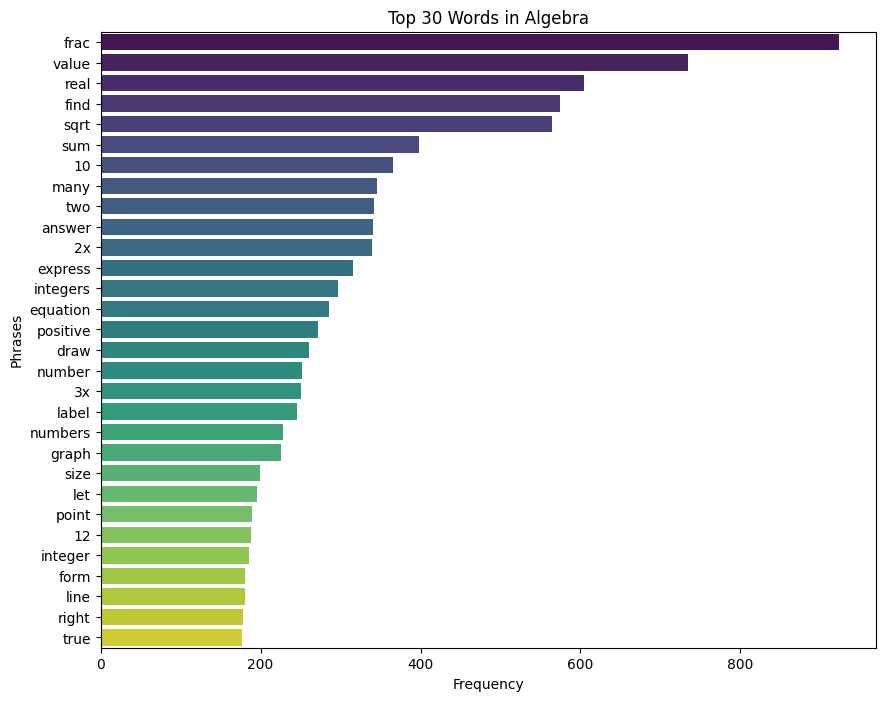

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


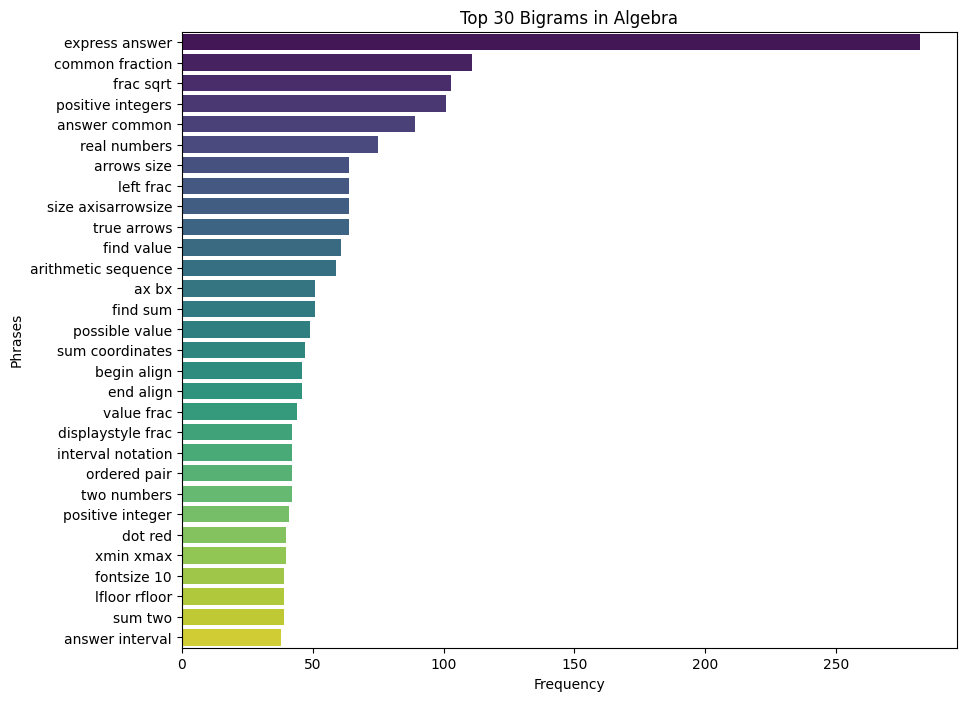

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


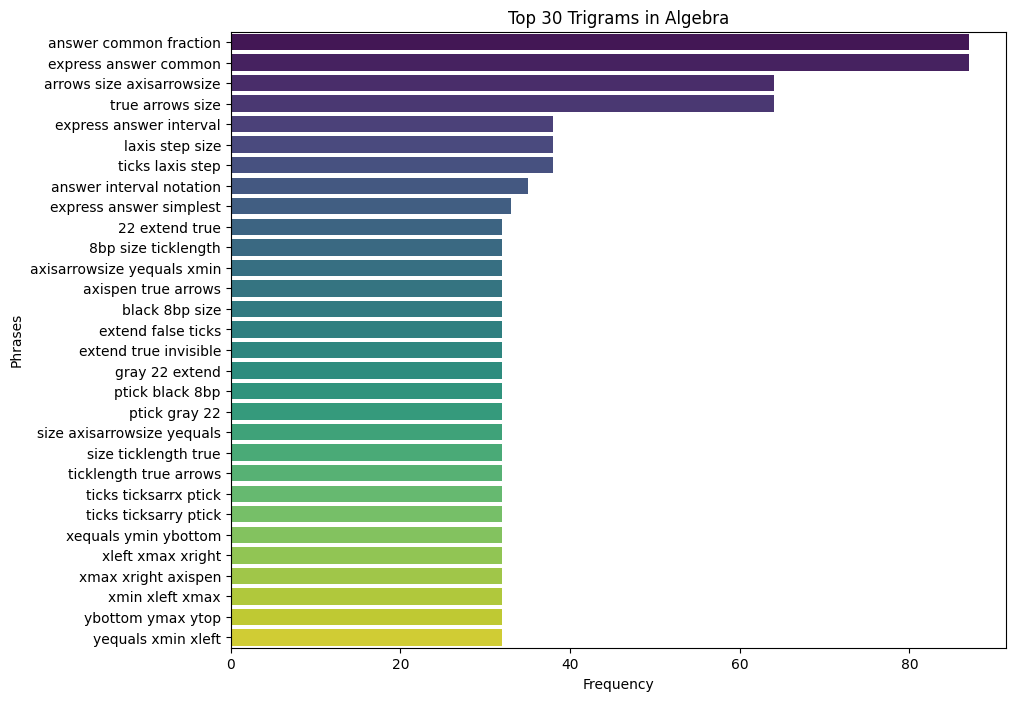

Processing: Counting & Probability


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


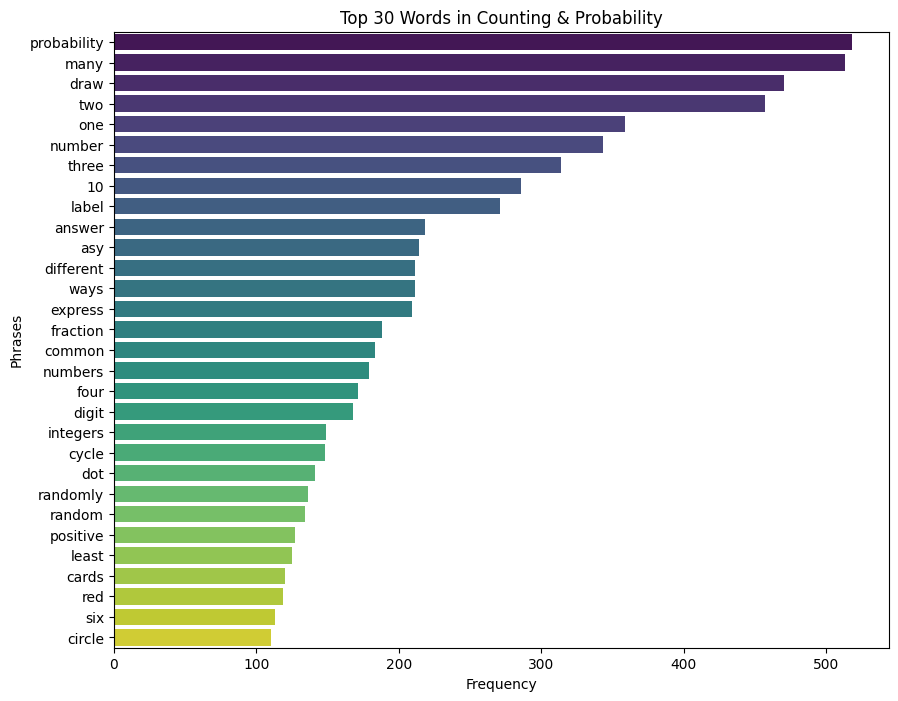

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


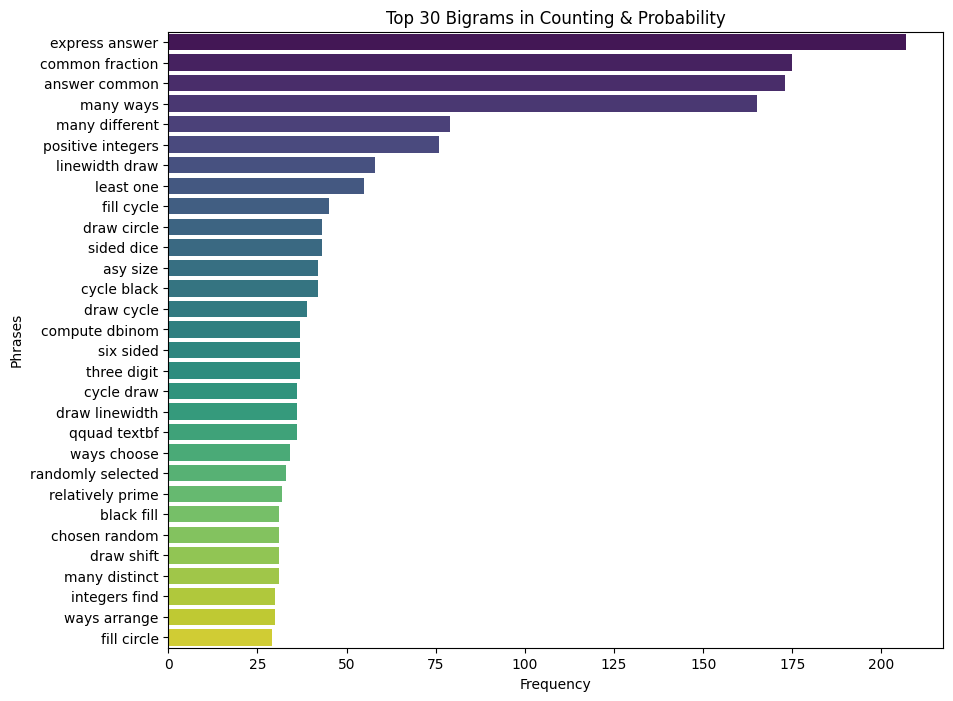

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


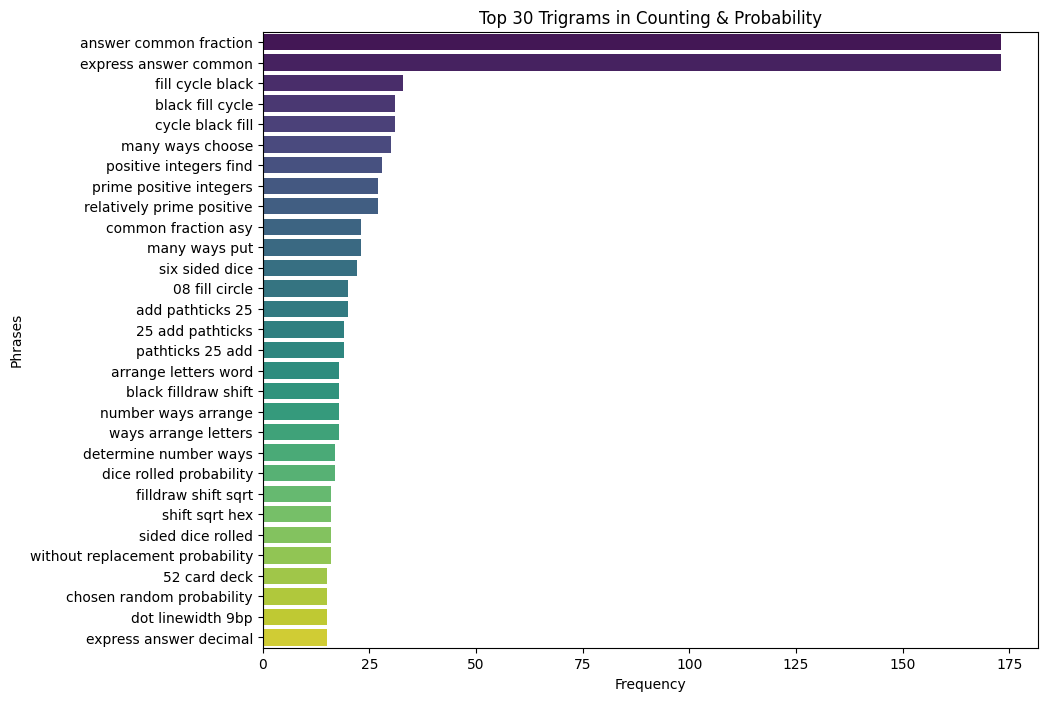

Processing: Geometry


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


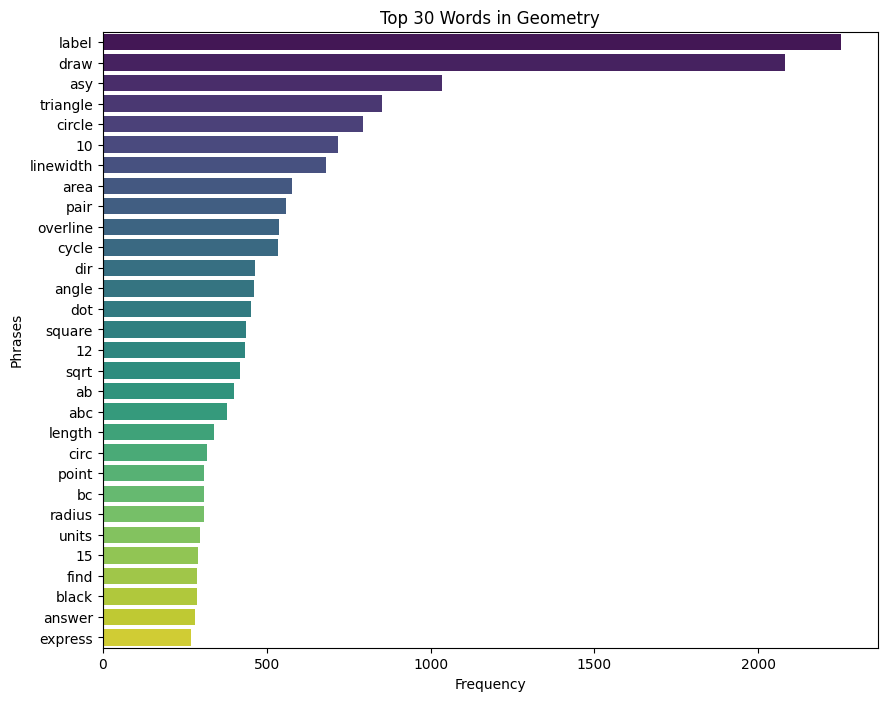

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


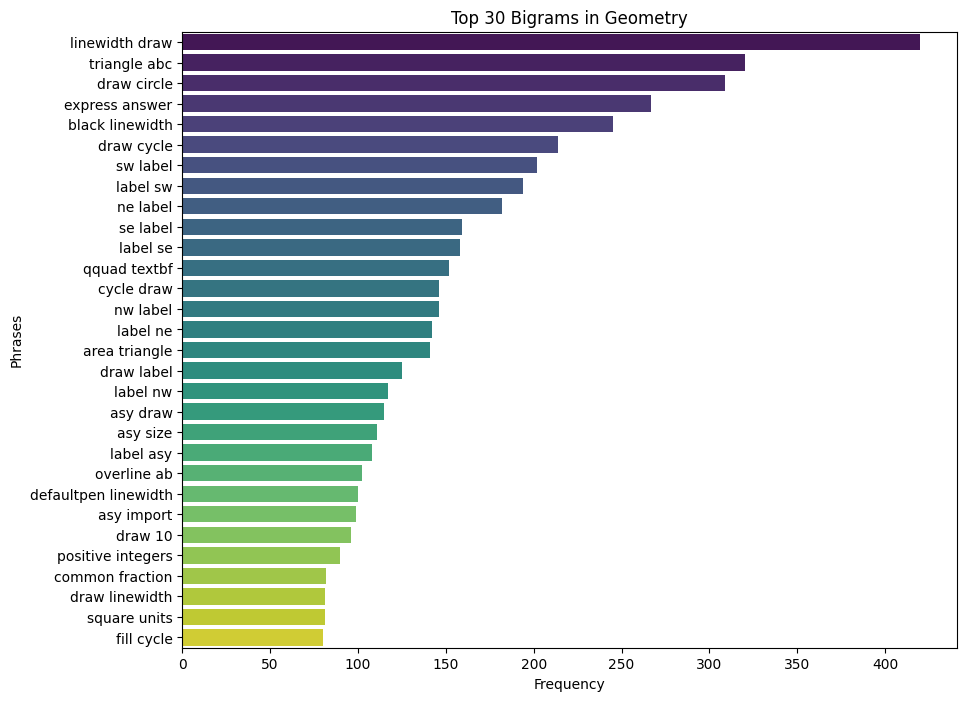

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


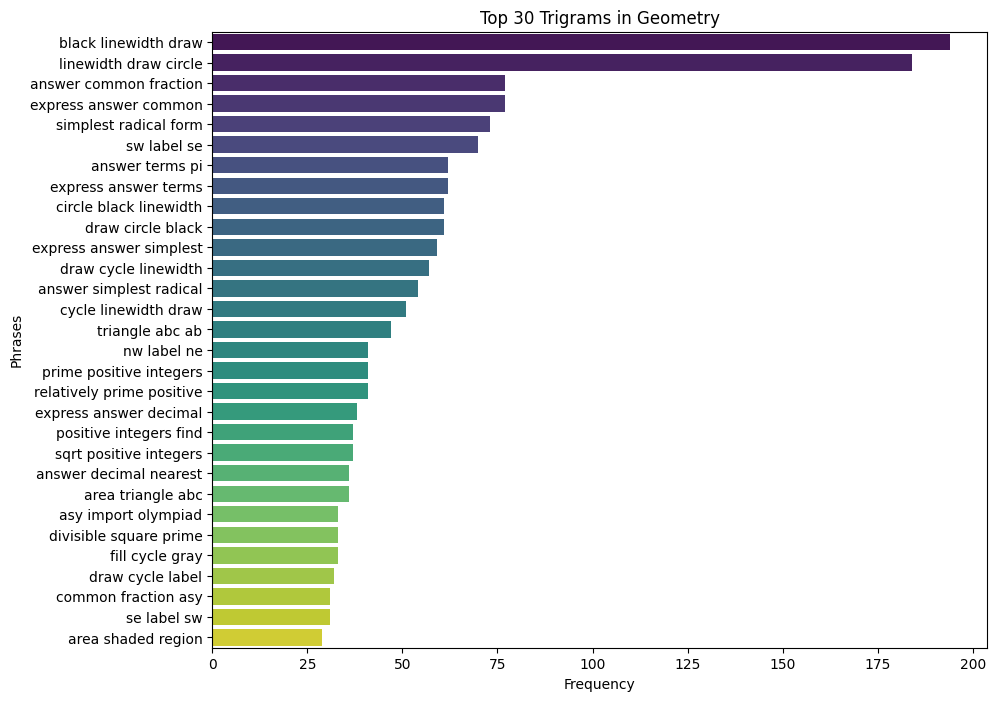

Processing: Intermediate Algebra


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


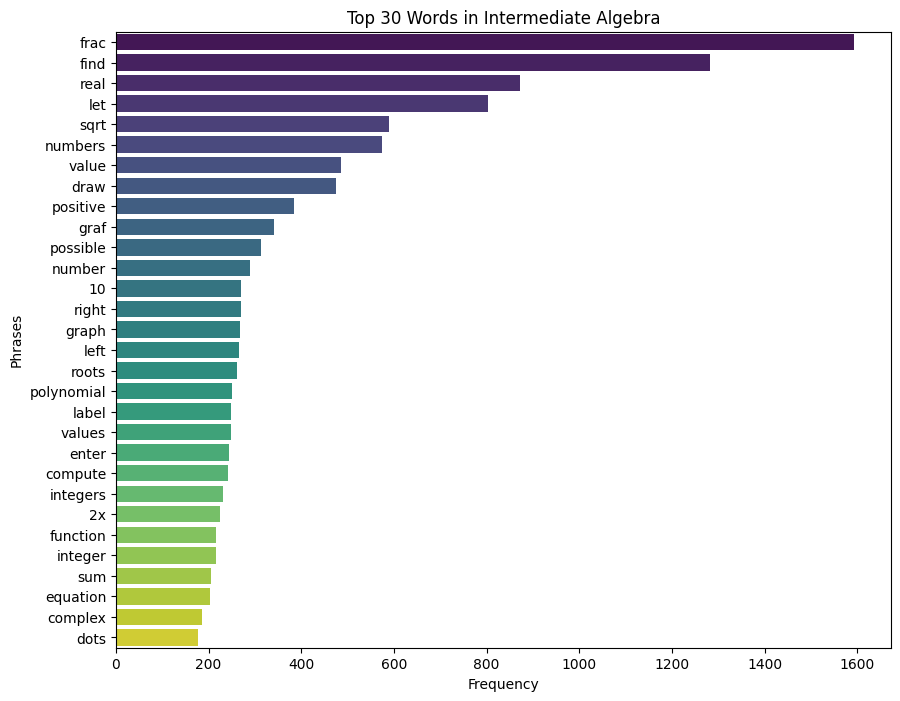

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


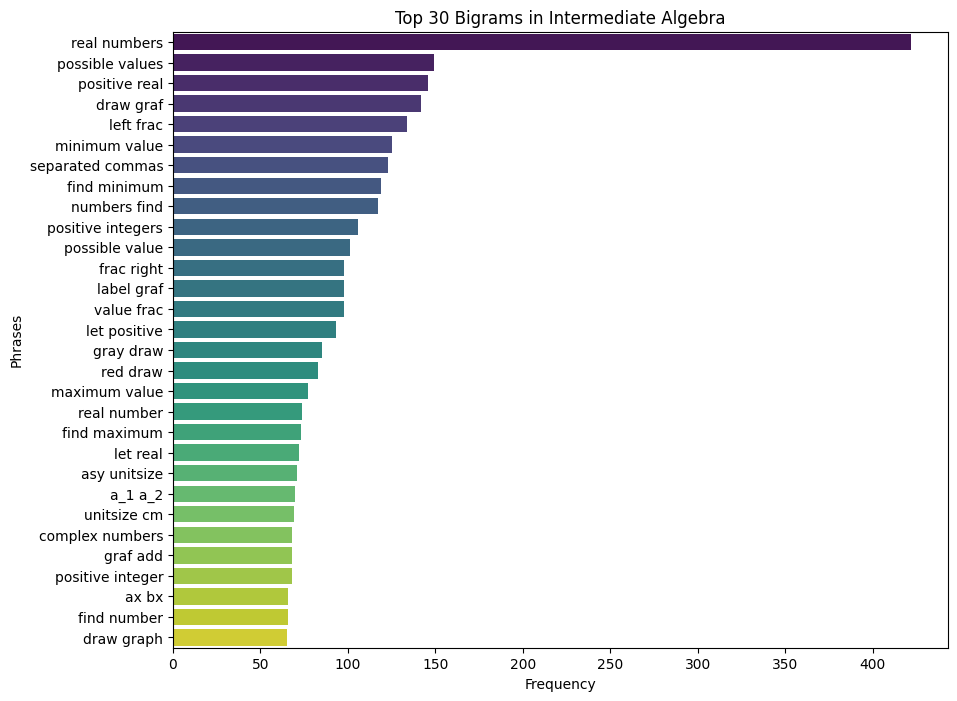

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


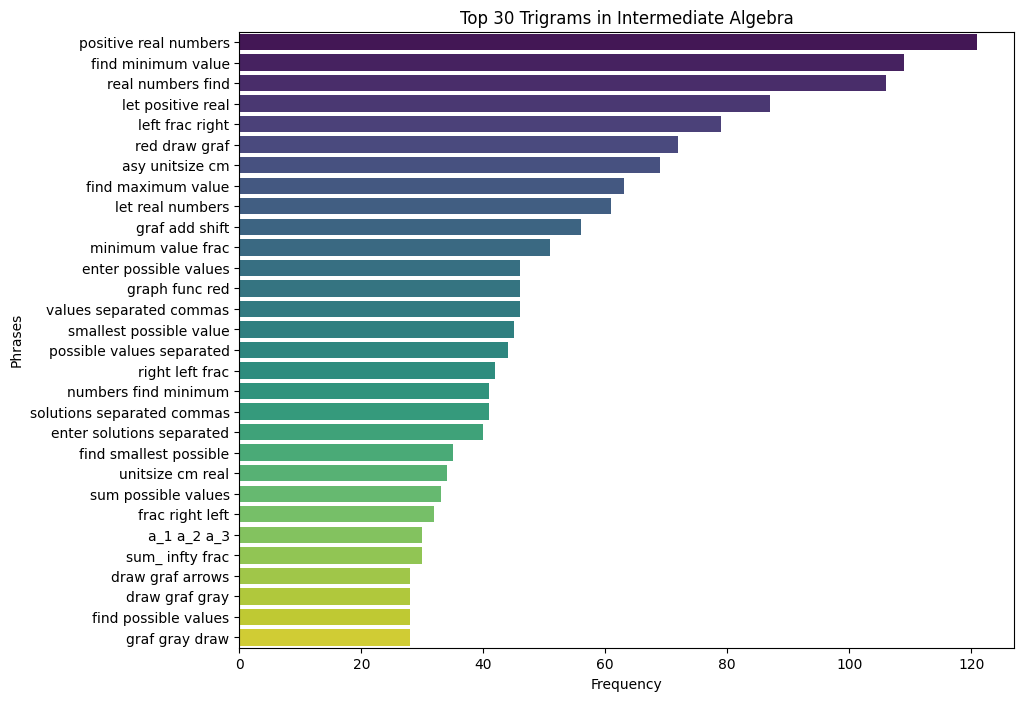

Processing: Number Theory


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


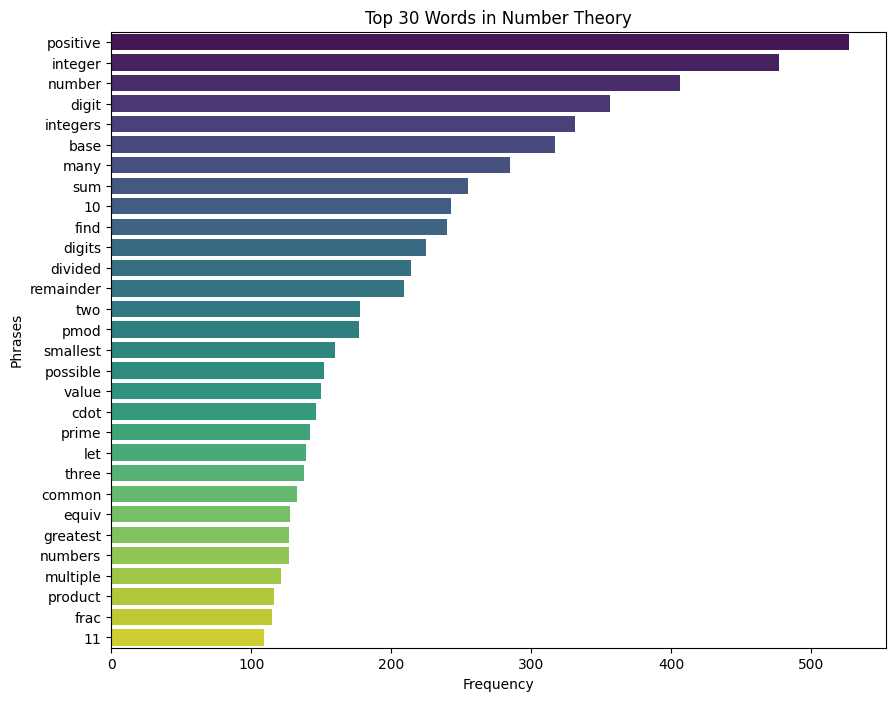

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


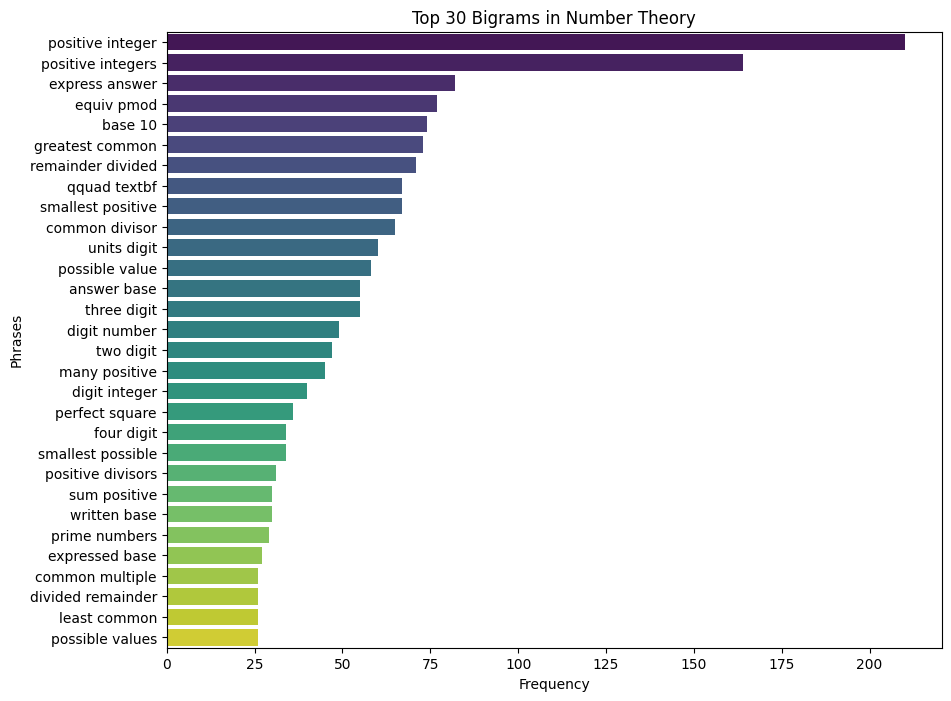

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


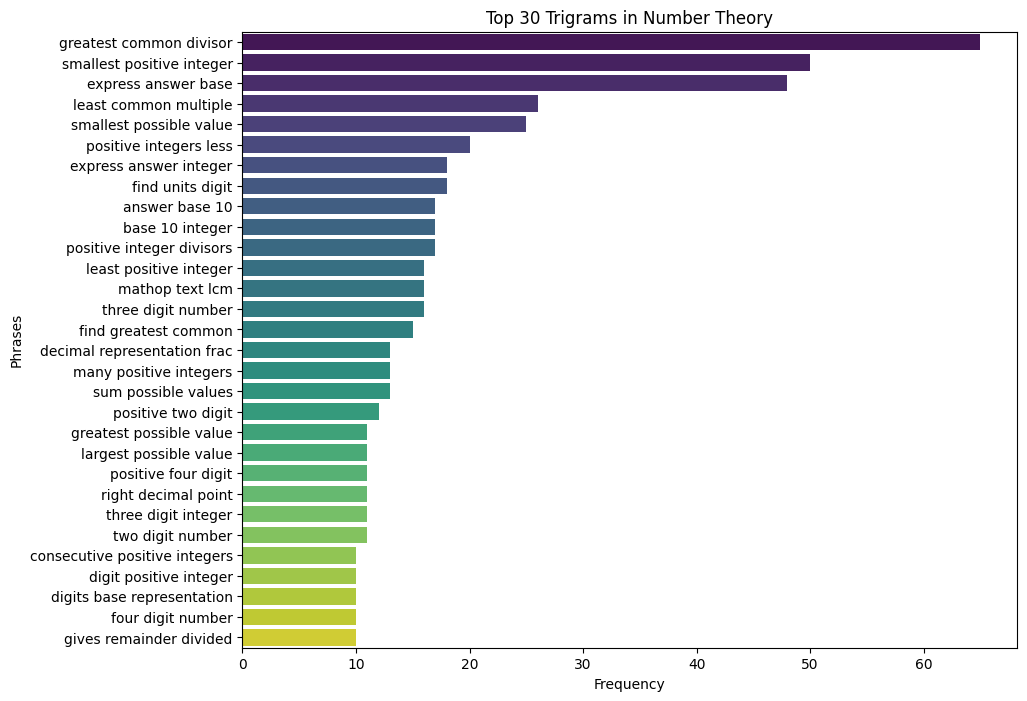

Processing: Prealgebra


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


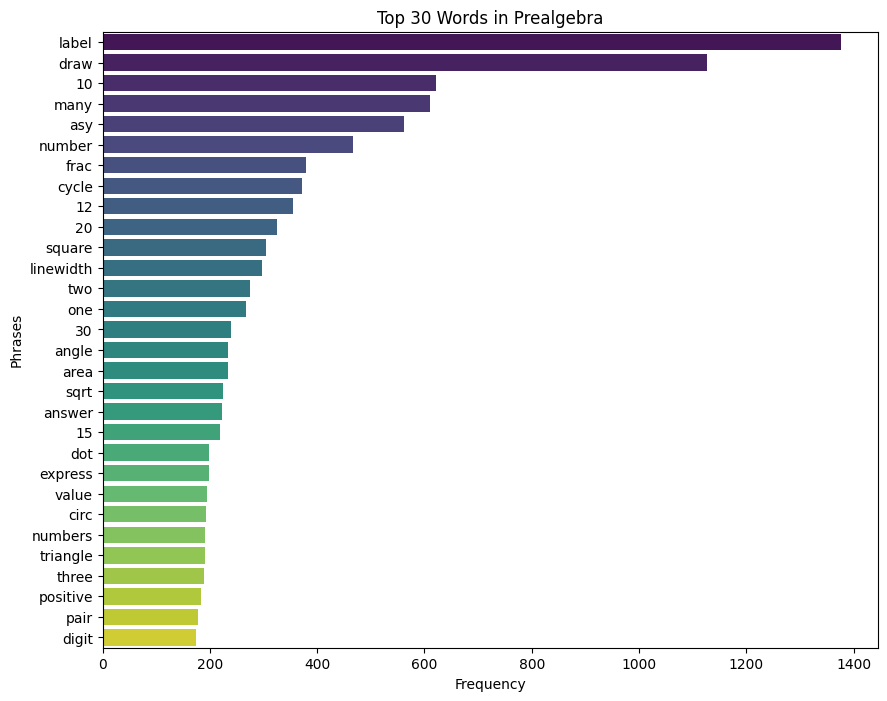

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


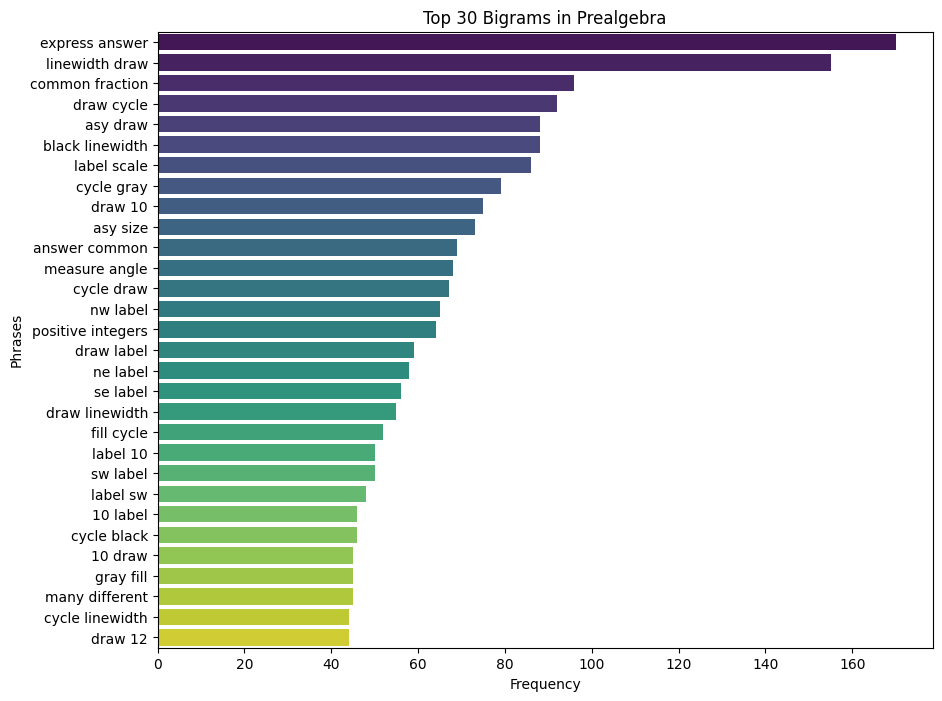

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


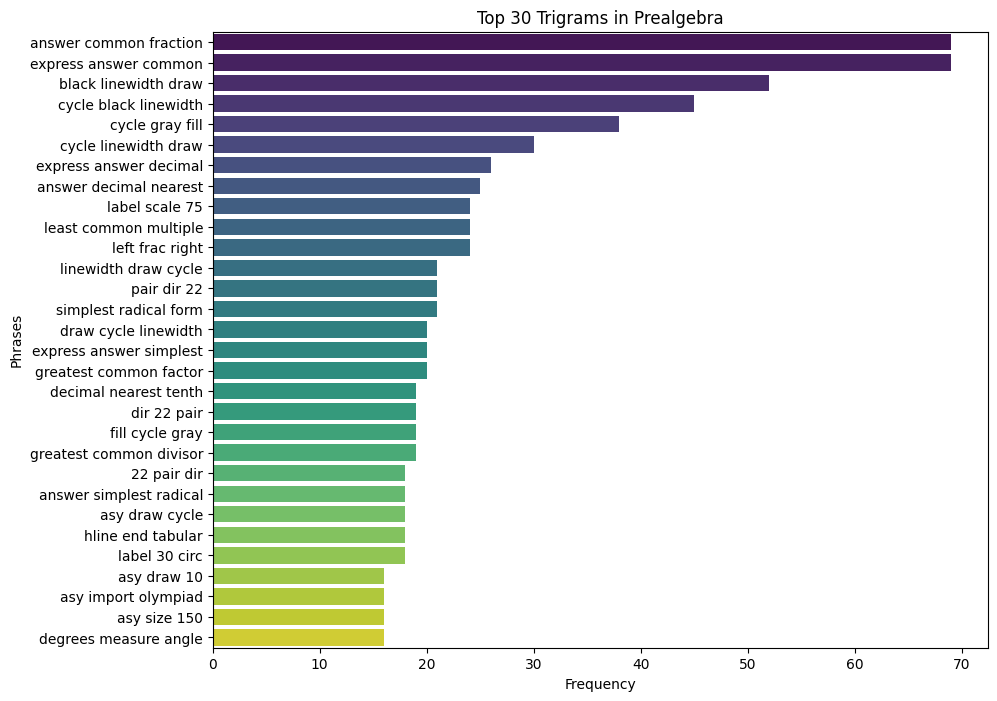

Processing: Precalculus


C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


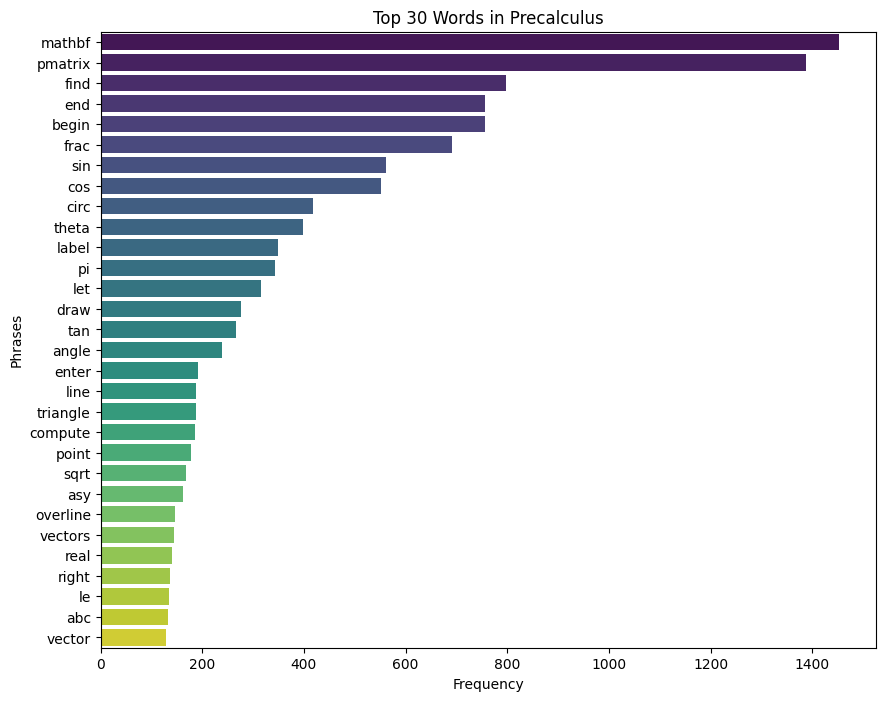

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


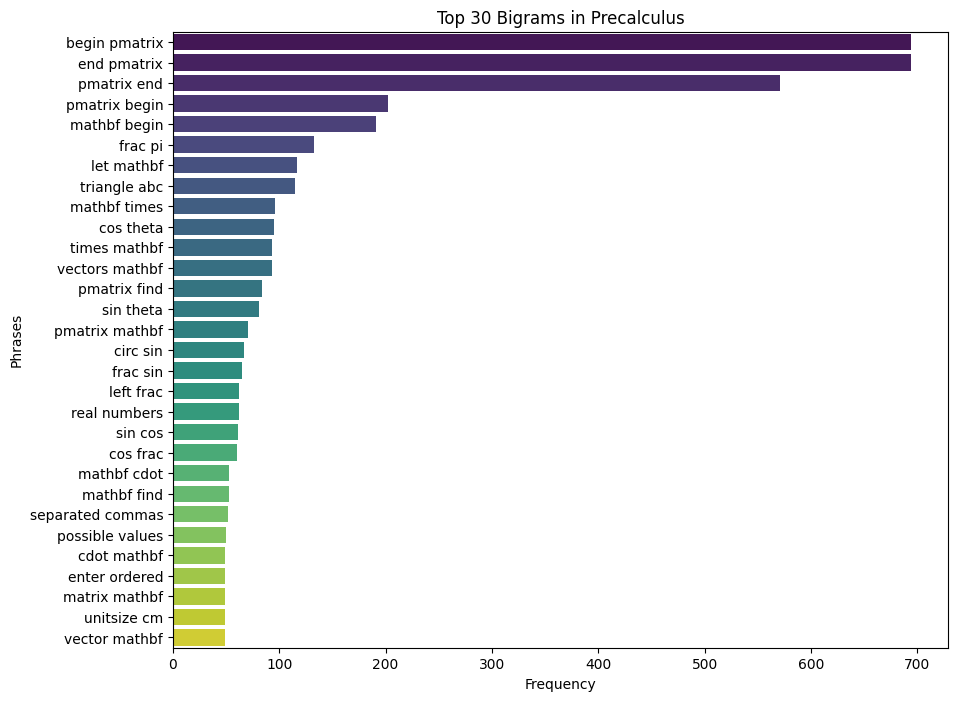

C:\Users\gapar\AppData\Local\Temp\ipykernel_34288\88580191.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


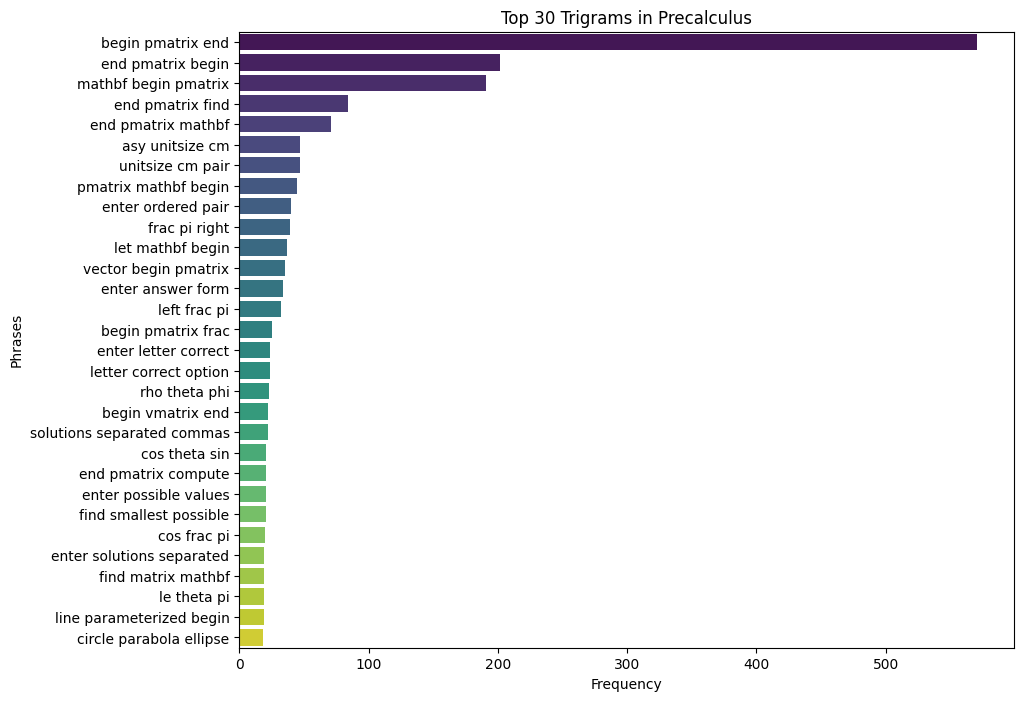

Processing: nan


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

# Ensure NLTK stop words are available
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # Convert set to list

# Load your data (Make sure to adjust the path to where your dataset is located)
# data = pd.read_csv('path_to_your_data.csv')

# Retrieve all unique problem types
problem_types = data['type'].unique()

# Initialize CountVectorizer for unigrams, bigrams, and trigrams
vectorizer_words = CountVectorizer(stop_words=stop_words, ngram_range=(1,1))
vectorizer_bigrams = CountVectorizer(stop_words=stop_words, ngram_range=(2,2))
vectorizer_trigrams = CountVectorizer(stop_words=stop_words, ngram_range=(3,3))

# Function to get top 30 features
def get_top_n_features(vectorizer, feature_counts):
    feature_names = vectorizer.get_feature_names_out()
    sum_features = feature_counts.sum(axis=0)
    features_and_counts = sorted(zip(feature_names, sum_features.A1), key=lambda x: x[1], reverse=True)
    
    # Filter out n-grams with repeated words
    filtered_features = [feature for feature in features_and_counts if len(set(feature[0].split())) == len(feature[0].split())]
    
    return filtered_features[:30]

# Plotting function
def plot_ngrams(ngrams, title):
    words, counts = zip(*ngrams)
    plt.figure(figsize=(10, 8))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Phrases')
    plt.show()

# Loop through each problem type
for problem_type in problem_types:
    print(f"Processing: {problem_type}")
    specific_type_data = data[data['type'] == problem_type]['problem']
    
    # Fit and transform the data for each type
    words_counts = vectorizer_words.fit_transform(specific_type_data)
    bigrams_counts = vectorizer_bigrams.fit_transform(specific_type_data)
    trigrams_counts = vectorizer_trigrams.fit_transform(specific_type_data)
    
    # Retrieve and plot top 30 unigrams, bigrams, and trigrams
    top_words = get_top_n_features(vectorizer_words, words_counts)
    top_bigrams = get_top_n_features(vectorizer_bigrams, bigrams_counts)
    top_trigrams = get_top_n_features(vectorizer_trigrams, trigrams_counts)
    
    plot_ngrams(top_words, f"Top 30 Words in {problem_type}")
    plot_ngrams(top_bigrams, f"Top 30 Bigrams in {problem_type}")
    plot_ngrams(top_trigrams, f"Top 30 Trigrams in {problem_type}")
